# Métodos y Aplicaciones de Analítica II
#### Proyecto Caso de negocio - Predicción de Churn en un banco 

### 1. Exploratory Data Analysis (EDA)


#### Importar las librerías necesarias

In [10]:
!python Libraries.py


Verificando si hay una nueva versión de pip...
pip ha sido actualizado correctamente.
pandas ya está instalada.
matplotlib ya está instalada.
seaborn ya está instalada.
numpy ya está instalada.
scipy ya está instalada.
openpyxl ya está instalada.
scikit-learn no está instalada.
tensorflow ya está instalada.
imbalanced-learn no está instalada.
pycaret ya está instalada.
scikeras ya está instalada.
Sesgo ya está instalada.

Instalando las siguientes librerías:
scikit-learn, imbalanced-learn

Las librerías han sido instaladas correctamente.

Todo está instalado correctamente y actualizado. ¡Listo para trabajar!


2024-11-09 16:30:29.189570: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 16:30:32.673215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import openpyxl as op
from numpy.lib.shape_base import column_stack
from scipy.stats import skew
from statistics import mean, stdev
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import sys

#### La función para leer el archivo .CSV

In [15]:
df = pd.read_excel('../Datos/bank_churn.xlsx')
df.sample(5) 

clientnum     attrition_flag  customer_age gender  dependent_count  \
5284  720118908  Existing Customer            26      M                0   
1464  718894233  Existing Customer            53      F                2   
1682  709635858  Existing Customer            56      F                3   
7399  742572558  Existing Customer            32      F                0   
4435  712783083  Attrited Customer            48      F                4   

     education_level marital_status income_category card_category  \
5284        Graduate        Married  Less than $40K          Blue   
1464        Graduate        Married     $40K - $60K          Blue   
1682        Graduate        Married  Less than $40K          Blue   
7399     High School       Divorced         Unknown          Blue   
4435     High School        Married  Less than $40K          Blue   

      months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
5284              36  ...                       2                      4   
1464              36  ...                       2                      4   
1682              45  ...                       2                      3   
7399              25  ...                       3                      1   
4435              37  ...                       2                      3   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
5284        9916.0                    0           9916.0   
1464        2956.0                 1391           1565.0   
1682        2235.0                    0           2235.0   
7399       12268.0                 1165          11103.0   
4435        3607.0                    0           3607.0   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
5284                 0.793             3477              65   
1464                 0.698             2116              63   
1682                 0.556             1229              27   
7399                 0.832             4905              82   
4435                 0.504             2013              35   

      total_ct_chng_q4_q1  avg_utilization_ratio  
5284                0.667                  0.000  
1464                0.575                  0.471  
1682                0.350                  0.000  
7399                0.822                  0.095  
4435                0.458                  0.000  

[5 rows x 21 columns]

#### Comprobaremos los tipos de datos de cada columna

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [324]:
df.describe()

clientnum  customer_age  dependent_count  months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       total_relationship_count  months_inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       total_ct_chng_q4_q1  avg_utilization_ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#### Convertir los tipos de datos de cada columna

In [325]:
#Convertir...
df['attrition_flag'] = df['attrition_flag'].astype('category')
df['customer_age'] = df['customer_age'].astype(int)
df['gender'] = df['gender'].astype('category')
df['dependent_count'] = df['dependent_count'].astype('category')
df['education_level'] = df['education_level'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['income_category'] = df['income_category'].astype('category')
df['card_category'] = df['card_category'].astype('category')
df['months_on_book'] = df['months_on_book'].astype(int)
df['total_relationship_count'] = df['total_relationship_count'].astype('category')
df['months_inactive_12_mon'] = df['months_inactive_12_mon'].astype('category')
df['contacts_count_12_mon'] = df['contacts_count_12_mon'].astype('category')
df['credit_limit'] = df['credit_limit'].astype(int)
df['total_revolving_bal'] = df['total_revolving_bal'].astype(int)
df['avg_open_to_buy'] = df['avg_open_to_buy'].astype(int)
df['total_amt_chng_q4_q1'] = df['total_amt_chng_q4_q1'].astype(float)
df['total_trans_amt'] = df['total_trans_amt'].astype(int)
df['total_trans_ct'] = df['total_trans_ct'].astype(int)
df['total_ct_chng_q4_q1'] = df['total_ct_chng_q4_q1'].astype(float)
df['avg_utilization_ratio'] = df['avg_utilization_ratio'].astype(float)

# Verificamos los cambios en los tipos de datos
print(df.dtypes)


clientnum                      int64
attrition_flag              category
customer_age                   int64
gender                      category
dependent_count             category
education_level             category
marital_status              category
income_category             category
card_category               category
months_on_book                 int64
total_relationship_count    category
months_inactive_12_mon      category
contacts_count_12_mon       category
credit_limit                   int64
total_revolving_bal            int64
avg_open_to_buy                int64
total_amt_chng_q4_q1         float64
total_trans_amt                int64
total_trans_ct                 int64
total_ct_chng_q4_q1          float64
avg_utilization_ratio        float64
dtype: object


#### Convertir los tipos de datos de cada columna

In [326]:
# Establece el número máximo de columnas a mostrar
pd.set_option('display.max_columns', 56)
print(df.isnull().sum())

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64


In [327]:
# cuenta de valores por cada columna y sus categorías
for col in df.select_dtypes(include=['category','object','bool']).columns:
  print(col)
  print(df[col].value_counts())
  print('\n') 

attrition_flag
attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


gender
gender
F    5358
M    4769
Name: count, dtype: int64


dependent_count
dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64


education_level
education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


marital_status
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


income_category
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


card_category
card_category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


total_relationship_count
total_relationship_co

#### Duplicar el df original, eliminar columna ID, seleccionar solo las columnas numéricas y describe

In [328]:
df2 = df.copy()
df2 = df2.drop(columns=['clientnum'])
df_numeric = df2.select_dtypes(include=[np.number])

In [329]:
df_numeric.describe()

customer_age  months_on_book  credit_limit  total_revolving_bal  \
count  10127.000000    10127.000000  10127.000000         10127.000000   
mean      46.325960       35.928409   8631.938679          1162.814061   
std        8.016814        7.986416   9088.788539           814.987335   
min       26.000000       13.000000   1438.000000             0.000000   
25%       41.000000       31.000000   2555.000000           359.000000   
50%       46.000000       36.000000   4549.000000          1276.000000   
75%       52.000000       40.000000  11067.500000          1784.000000   
max       73.000000       56.000000  34516.000000          2517.000000   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.124617              0.759941      4404.086304       64.858695   
std        9090.695763              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       total_ct_chng_q4_q1  avg_utilization_ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#### Configuración de visualización, exploración de datos categóricos, exploración de datos numéricos, diagrama de dispersión entre las principales variables numéricas

In [330]:
# Configuración de visualización agrupada
sns.set(style="whitegrid")

In [331]:
from Graficas_EDA import plot_categorical
from Graficas_EDA import plot_numerical
from Graficas_EDA import plot_scatter

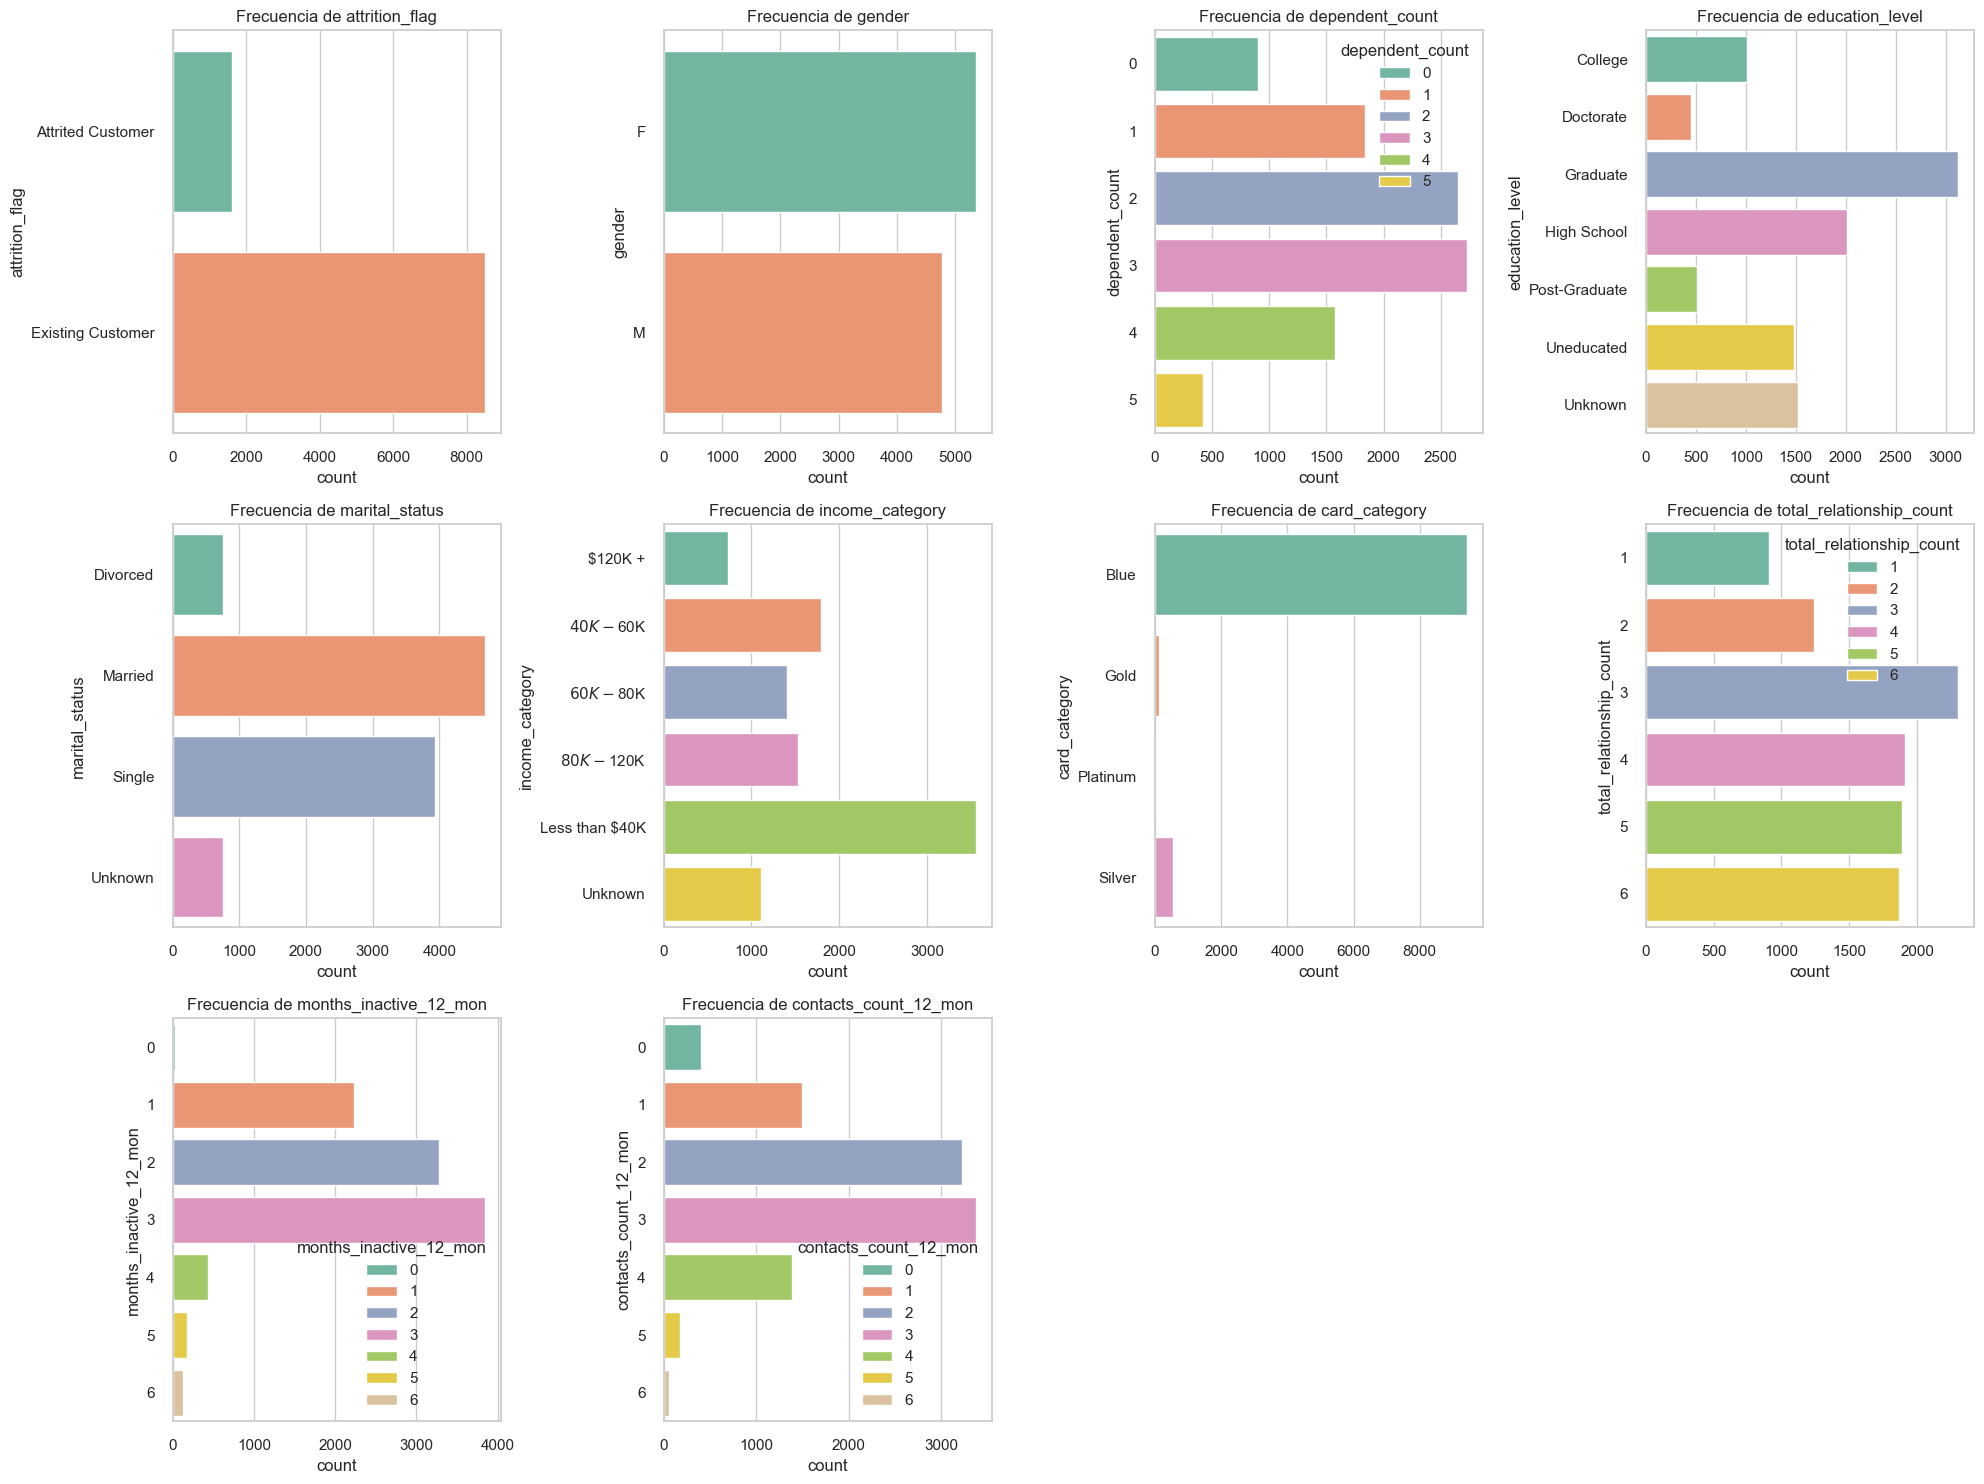

In [332]:
# Visualización de variables categóricas
plot_categorical(df)

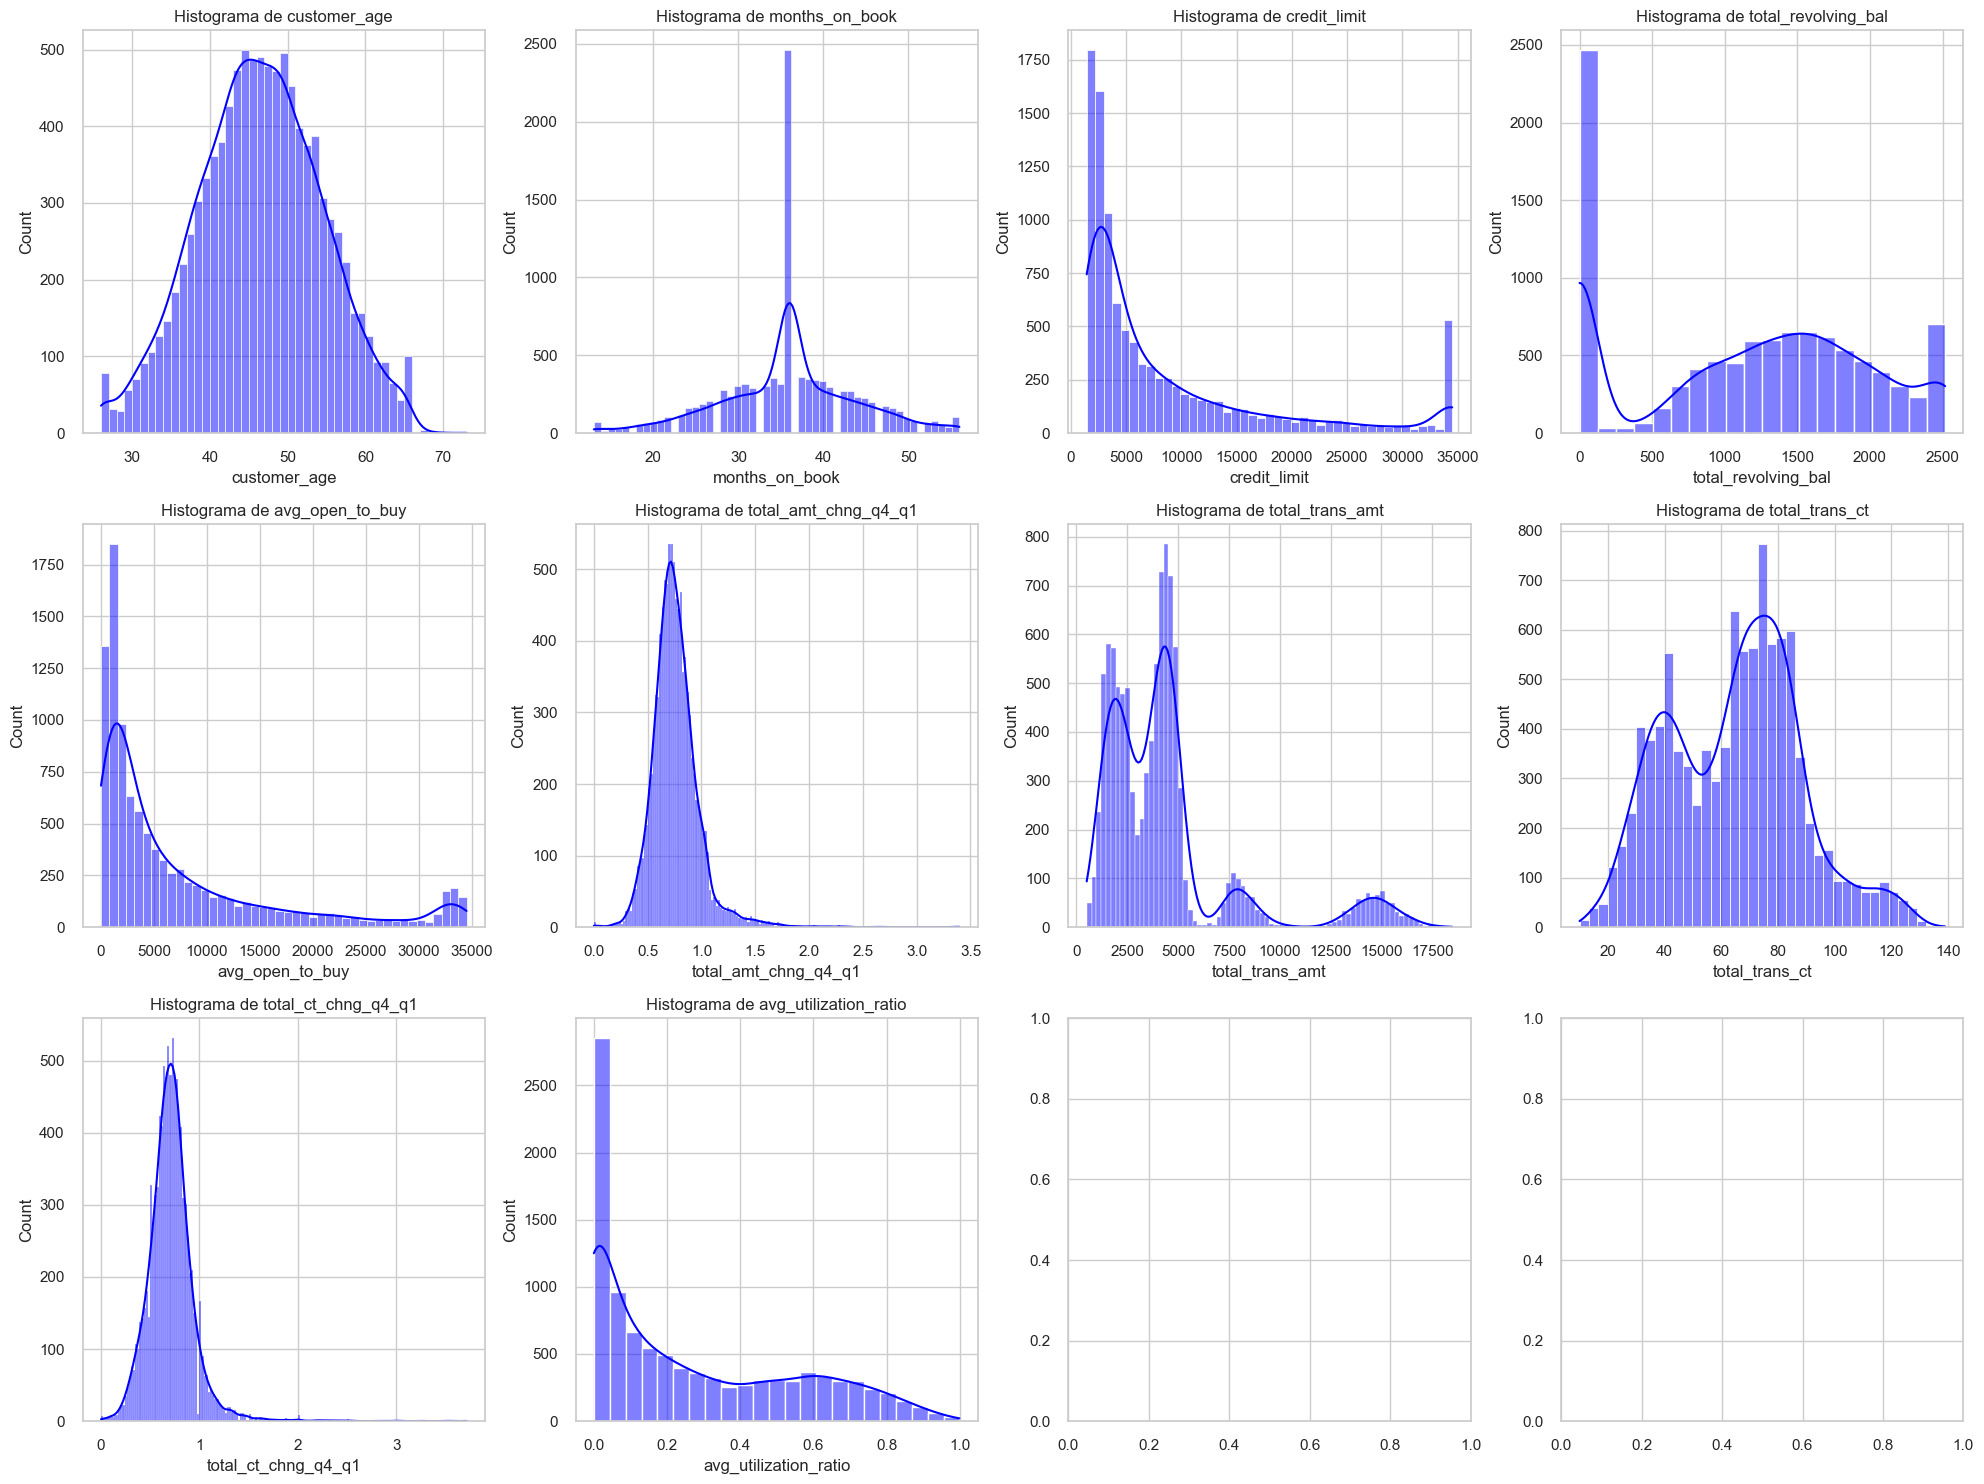

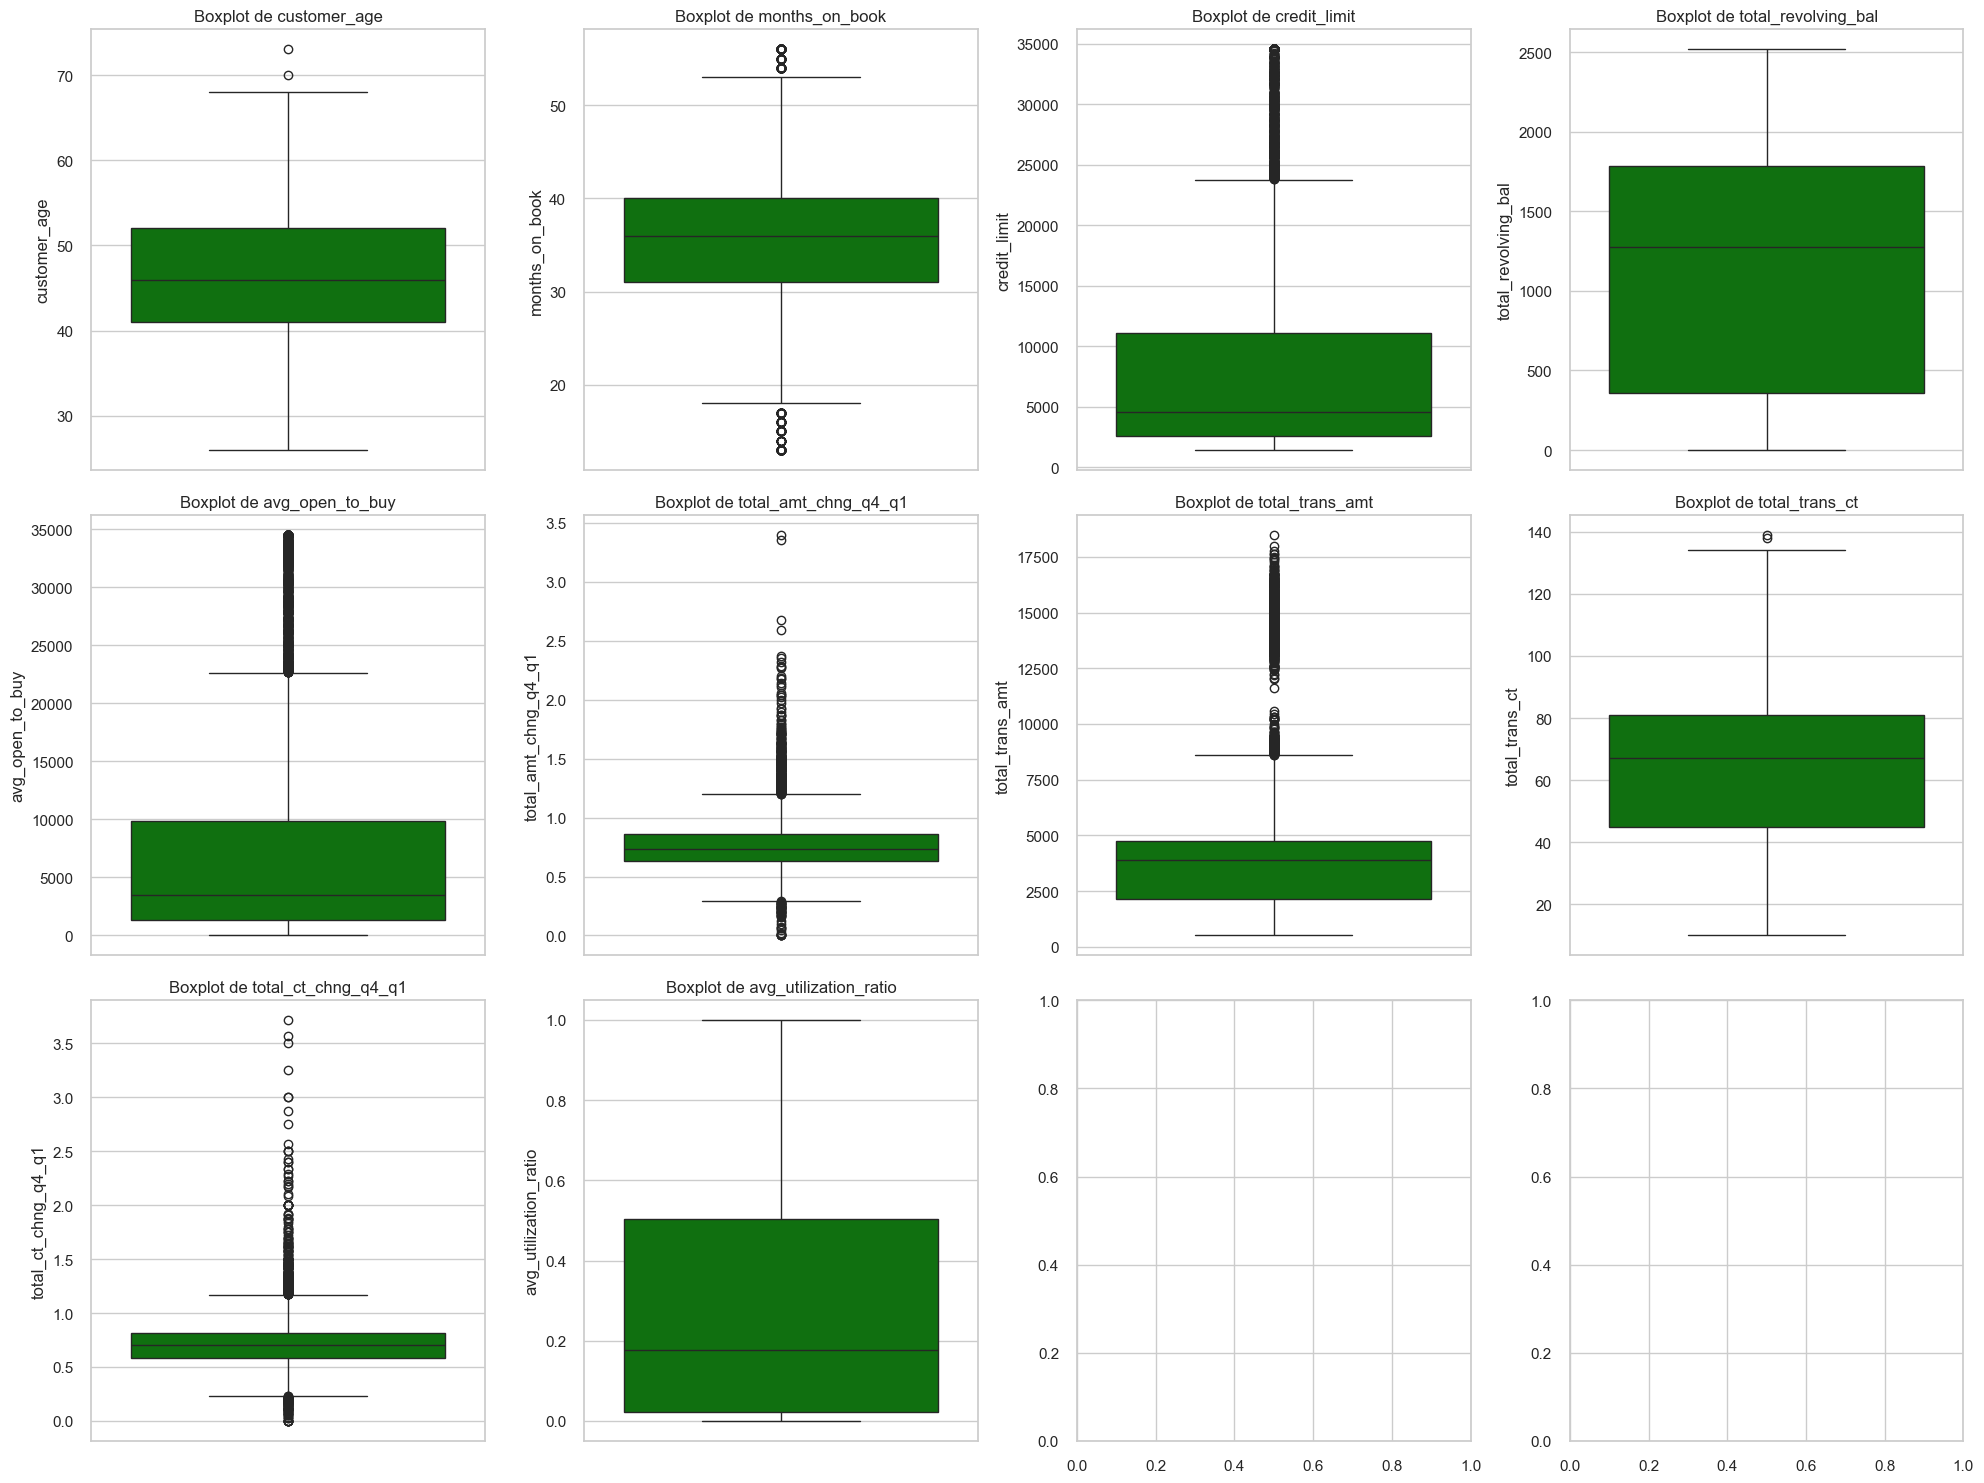

In [333]:
# Visualización de variables numéricas
plot_numerical(df2)

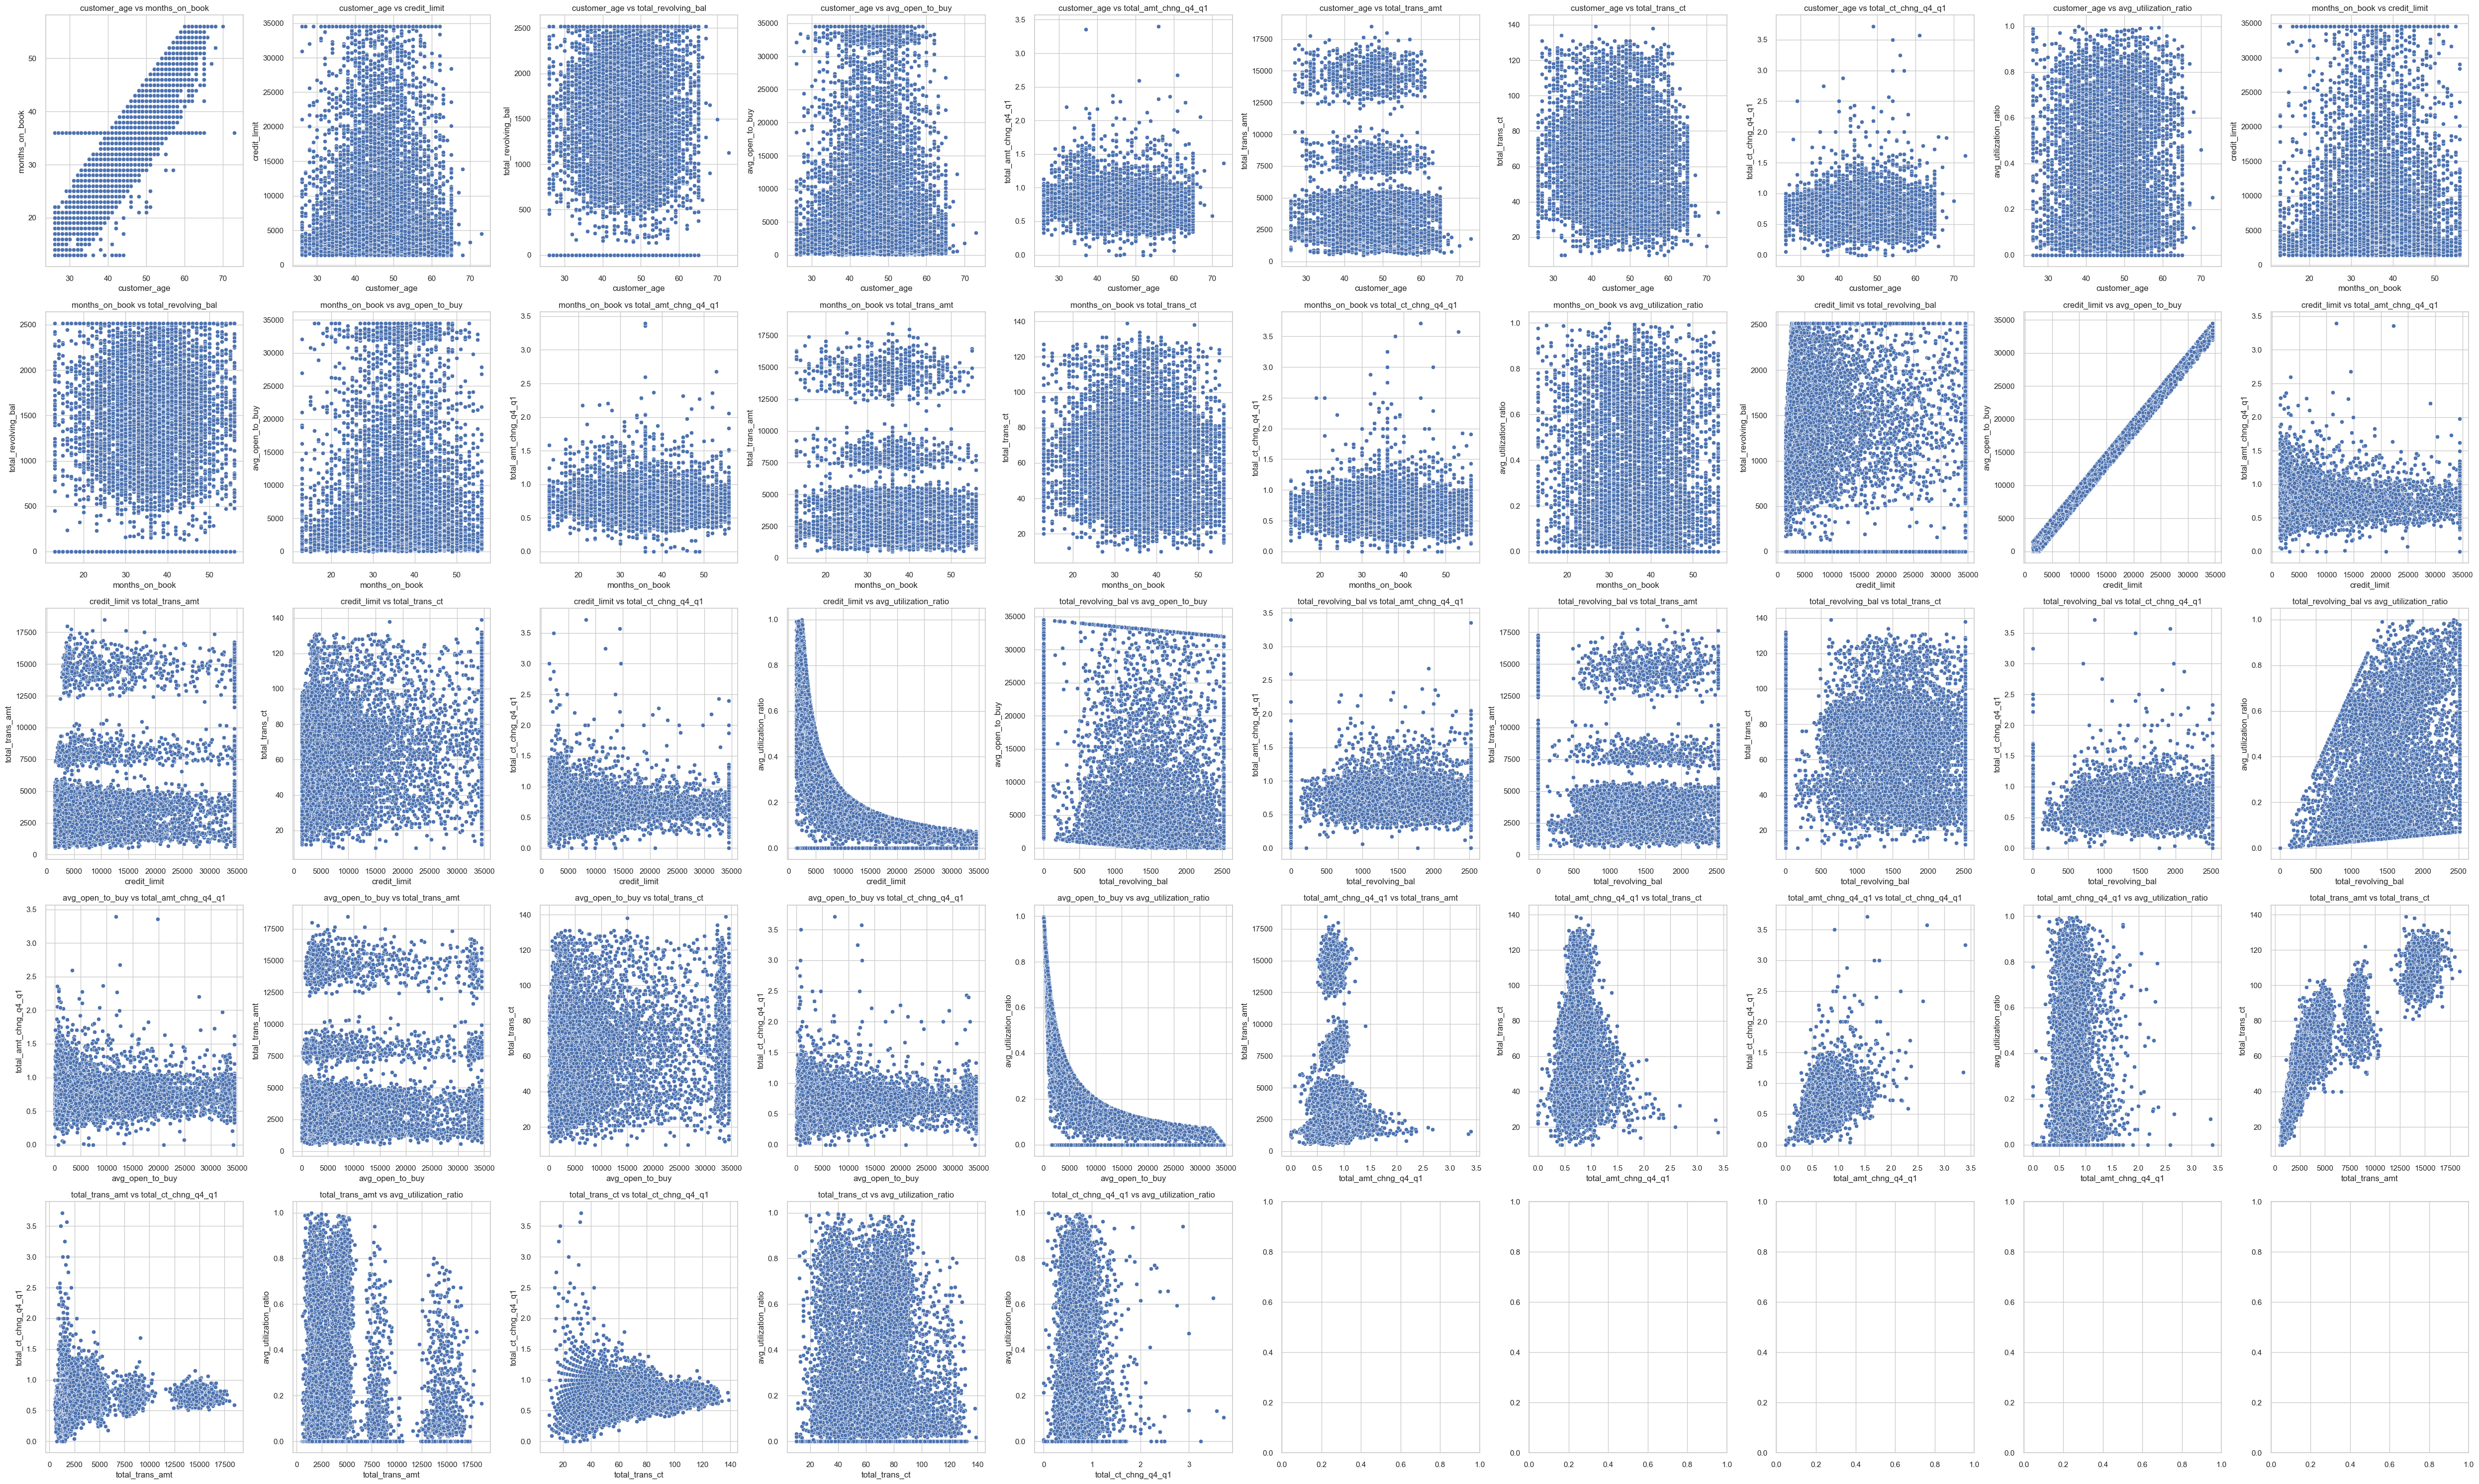

In [334]:
plot_scatter(df_numeric)

#### Análisis Multivariado 

In [421]:
import importlib
import Multivariado  # Nombre del archivo con la clase SVMChurn
importlib.reload(Multivariado)


<module 'Multivariado' from '/Users/andreeamharaaronquiroz/Documents/MAESTRIA ANDREE/ProyectoChurn2/Multivariado.py'>

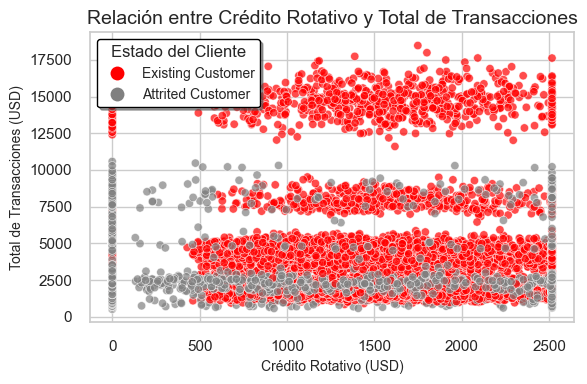

In [422]:
import Multivariado as gm

# Gráfico de dispersión
gm.grafico_dispersion(df, x='total_revolving_bal', y='total_trans_amt',
                      title='Relación entre Crédito Rotativo y Total de Transacciones',
                      xlabel='Crédito Rotativo (USD)', ylabel='Total de Transacciones (USD)')



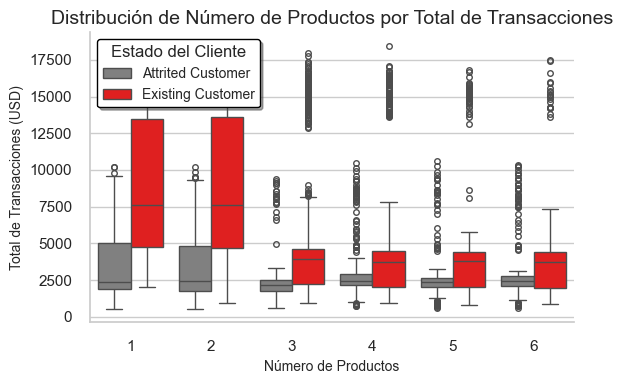

In [423]:

# Gráfico de cajas y bigotes
gm.grafico_cajas(df, x='total_relationship_count', y='total_trans_amt',
                 title='Distribución de Número de Productos por Total de Transacciones',
                 xlabel='Número de Productos', ylabel='Total de Transacciones (USD)')

#### Detección de datos atípicos usando el método del rango intercuartílico

In [7]:
sys.path.append(os.path.abspath('../Codigo'))
from OutliersDetection import OutlierDetector

In [336]:
outliers = OutlierDetector(df2)
outliers_summary_df = outliers.outliers_summary()
outliers_summary_df

Column  Outlier_Count  Outlier_Percentage
0           customer_age              2            0.019749
1         months_on_book            386            3.811593
2           credit_limit            984            9.716599
3    total_revolving_bal              0            0.000000
4        avg_open_to_buy            963            9.509233
5   total_amt_chng_q4_q1            396            3.910339
6        total_trans_amt            896            8.847635
7         total_trans_ct              2            0.019749
8    total_ct_chng_q4_q1            394            3.890590
9  avg_utilization_ratio              0            0.000000

In [337]:
# Verificar nombre de las columnas en df_numeric
df2['attrition_flag'] = df2['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_numeric = df2.select_dtypes(include=[np.number])
df_numeric['attrition_flag'] = df2['attrition_flag']
print(df_numeric.columns)

Index(['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'attrition_flag'],
      dtype='object')


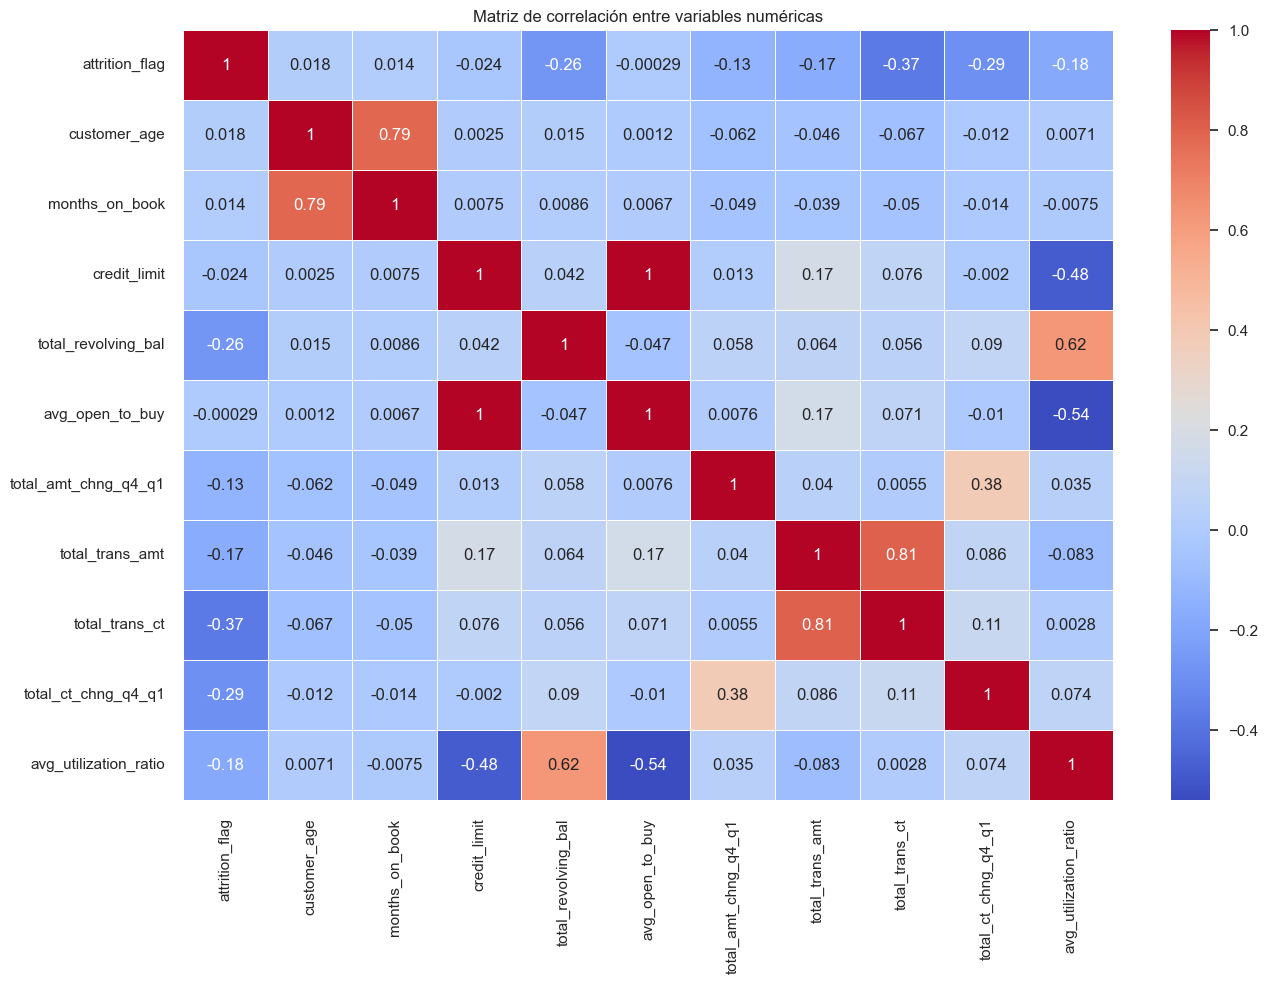

In [338]:
# Matriz de correlación de variables numéricas
corr_matrix = df_numeric.corr()

# Asegurarse de que 'Retained.in.2012.' esté en la lista de columnas
cols = [col for col in corr_matrix.columns if col != 'attrition_flag']
cols = ['attrition_flag'] + cols

# Reordenar la matriz de correlación
corr_matrix = corr_matrix[cols].loc[cols]

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

<Axes: xlabel='gender', ylabel='credit_limit'>

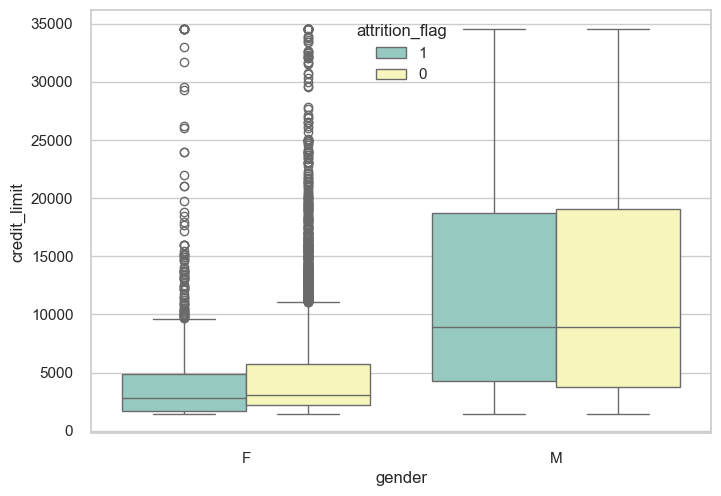

In [339]:
sns.boxplot(data= df2, 
            x = 'gender', y = 'credit_limit', hue = 'attrition_flag', palette='Set3')

<Axes: xlabel='attrition_flag', ylabel='credit_limit'>

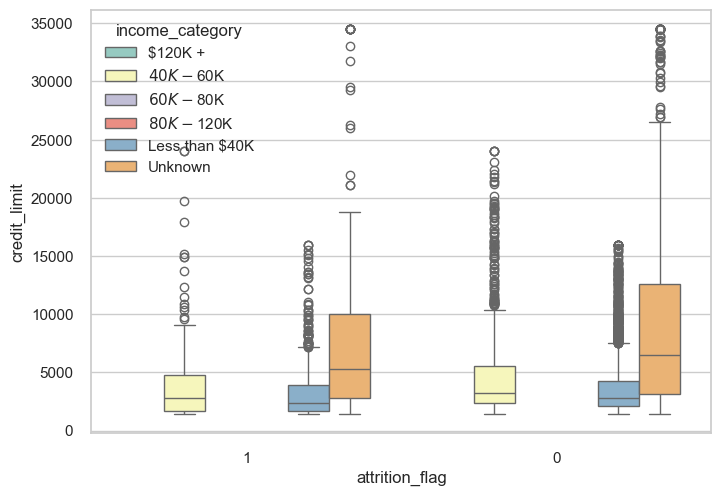

In [340]:
sns.boxplot(data=df2[df2['gender'] == 'F'],
x = 'attrition_flag', y = 'credit_limit', hue = 'income_category', palette = 'Set3')

<Axes: xlabel='attrition_flag', ylabel='credit_limit'>

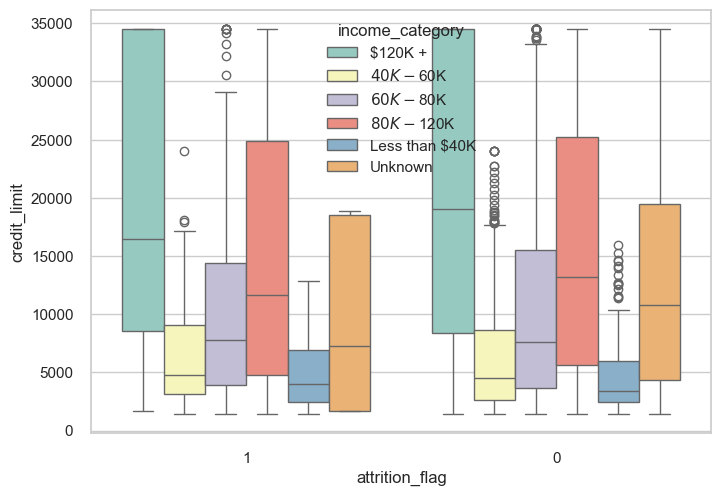

In [341]:
sns.boxplot(data=df2[df2['gender'] == 'M'],
x = 'attrition_flag', y = 'credit_limit', hue = 'income_category', palette = 'Set3')

### 2. Data preparation

#### Imputación de datos que fueron categorizados como "Unknown"

#### Imputación para la variable 'Income category'

In [342]:
df2[['income_category', 'card_category', 'credit_limit']].groupby(
    ['income_category', 'card_category'], observed = True).agg({'credit_limit': 'max'}).reset_index()


income_category card_category  credit_limit
0          $120K +          Blue         34516
1          $120K +          Gold         34516
2          $120K +      Platinum         34516
3          $120K +        Silver         34516
4      $40K - $60K          Blue         14987
5      $40K - $60K          Gold         23981
6      $40K - $60K      Platinum         23981
7      $40K - $60K        Silver         22361
8      $60K - $80K          Blue         24657
9      $60K - $80K          Gold         34516
10     $60K - $80K      Platinum         34516
11     $60K - $80K        Silver         34516
12    $80K - $120K          Blue         34516
13    $80K - $120K          Gold         34516
14    $80K - $120K      Platinum         34516
15    $80K - $120K        Silver         34516
16  Less than $40K          Blue          9977
17  Less than $40K          Gold         15987
18  Less than $40K      Platinum         15987
19  Less than $40K        Silver         14910
20         Unknown          Blue         29939
21         Unknown          Gold         34516
22         Unknown      Platinum         34516
23         Unknown        Silver         34516

In [343]:
df2[['income_category', 'card_category','credit_limit']].groupby(['income_category','card_category'], observed=True).agg({'credit_limit': 'median'}).reset_index()

income_category card_category  credit_limit
0          $120K +          Blue       15769.0
1          $120K +          Gold       34516.0
2          $120K +      Platinum       34516.0
3          $120K +        Silver       34516.0
4      $40K - $60K          Blue        3454.0
5      $40K - $60K          Gold       23981.0
6      $40K - $60K      Platinum       23981.0
7      $40K - $60K        Silver       17304.0
8      $60K - $80K          Blue        6784.0
9      $60K - $80K          Gold       34516.0
10     $60K - $80K      Platinum       34516.0
11     $60K - $80K        Silver       29810.0
12    $80K - $120K          Blue       11617.0
13    $80K - $120K          Gold       34516.0
14    $80K - $120K      Platinum       34516.0
15    $80K - $120K        Silver       34516.0
16  Less than $40K          Blue        2705.0
17  Less than $40K          Gold       15987.0
18  Less than $40K      Platinum       15987.0
19  Less than $40K        Silver       12319.5
20         Unknown          Blue        5798.0
21         Unknown          Gold       34516.0
22         Unknown      Platinum       34516.0
23         Unknown        Silver       34516.0

Analizando la mediana y el máximo de los clientes cuya categoría de ingreso es "Unknown", se encuentra
similitud con la mediana y el máximo del límite de crédito del grupo cuya categoría de ingreso es 60K - 80K

In [344]:
df2['income_category'] = df2['income_category'].replace('Unknown', '$60K - $80K')
df2['income_category'].value_counts()

income_category
Less than $40K    3561
$60K - $80K       2514
$40K - $60K       1790
$80K - $120K      1535
$120K +            727
Name: count, dtype: int64

#### Imputación para la variable 'Education level'

In [345]:
df2[['education_level', 'income_category', 'credit_limit']].groupby(['education_level','income_category'], observed = True).agg({'credit_limit': 'median'}).reset_index()

education_level income_category  credit_limit
0          College         $120K +       16331.5
1          College     $40K - $60K        3600.0
2          College     $60K - $80K        6846.5
3          College    $80K - $120K       12918.0
4          College  Less than $40K        2718.0
5        Doctorate         $120K +       20148.0
6        Doctorate     $40K - $60K        3532.0
7        Doctorate     $60K - $80K        7306.0
8        Doctorate    $80K - $120K       10292.0
9        Doctorate  Less than $40K        2695.5
10        Graduate         $120K +       18289.5
11        Graduate     $40K - $60K        4008.0
12        Graduate     $60K - $80K        7263.5
13        Graduate    $80K - $120K       12638.5
14        Graduate  Less than $40K        2799.0
15     High School         $120K +       17393.0
16     High School     $40K - $60K        3324.0
17     High School     $60K - $80K        7227.0
18     High School    $80K - $120K       13395.0
19     High School  Less than $40K        2826.0
20   Post-Graduate         $120K +       19834.0
21   Post-Graduate     $40K - $60K        3821.0
22   Post-Graduate     $60K - $80K        6998.5
23   Post-Graduate    $80K - $120K       16730.0
24   Post-Graduate  Less than $40K        2802.0
25      Uneducated         $120K +       19802.0
26      Uneducated     $40K - $60K        3645.0
27      Uneducated     $60K - $80K        6958.0
28      Uneducated    $80K - $120K       14480.0
29      Uneducated  Less than $40K        2730.0
30         Unknown         $120K +       19857.0
31         Unknown     $40K - $60K        3959.0
32         Unknown     $60K - $80K        7114.0
33         Unknown    $80K - $120K       10879.0
34         Unknown  Less than $40K        2709.5

Analizando la mediana y el máximo de los clientes cuyo de educación es "Unknown", se encuentra
similitud con la mediana del límite de crédito de los siguientes grupos

Unknown,120K + --- Post-Graduate  
Unknown,40K - 60K --- Graduate  
Unknown,60K - 80K --- High School  
Unknown,80K - 120K --- Doctorate  
Unknown,Less than $40K --- College

In [346]:
df2['education_level'] = np.where((df2['education_level'] == 'Unknown') & 
                                  (df2['income_category'] == '$120K +'), 
                                  'Post-Graduate', 
                                  df2['education_level'])

In [347]:
df2['education_level'] = np.where((df2['education_level'] == 'Unknown') & 
                                  (df2['income_category'] == '$40K - $60K'), 
                                  'Graduate', 
                                  df2['education_level'])

In [349]:
df2['education_level'] = np.where((df2['education_level'] == 'Unknown') & 
                                  (df2['income_category'] == '$60K - $80K'), 
                                  'High School', 
                                  df2['education_level'])

In [350]:
df2['education_level'] = np.where((df2['education_level'] == 'Unknown') &
                                  (df2['income_category'] == '$80K - $120K'),
                                  'Doctorate',
                                  df2['education_level'])

In [351]:
df2['education_level'] = np.where((df2['education_level'] == 'Unknown') &
                                  (df2['income_category'] == 'Less than $40K'),
                                  'College',
                                  df2['education_level'])

In [352]:
df2['education_level'].value_counts()

education_level
Graduate         3397
High School      2368
College          1569
Uneducated       1487
Doctorate         670
Post-Graduate     636
Name: count, dtype: int64

#### Imputación para la variable 'Marital status'

In [353]:
df2[['marital_status', 'credit_limit']].groupby(['marital_status'], observed = True).agg({'credit_limit': 'mean'}).reset_index()

marital_status  credit_limit
0       Divorced   9358.553476
1        Married   8076.645829
2         Single   8999.670302
3        Unknown   9445.268358

In [354]:
df2[['marital_status', 'credit_limit']].groupby(['marital_status'], observed = True).agg({'credit_limit': 'median'}).reset_index()

marital_status  credit_limit
0       Divorced        5119.5
1        Married        4234.0
2         Single        4712.0
3        Unknown        5222.0

Se incluye el 7,40% que corresponden a los Unknown en la categoría divorciados debido a que la media y mediana del límite de crédito son similares

In [355]:
df2['marital_status'] = df2['marital_status'].replace('Unknown', 'Divorced')

In [356]:
df2['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Divorced    1497
Name: count, dtype: int64

#### Agrupación de categorías de tarjetas de crédito

In [357]:
df2['card_category'].value_counts()

card_category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [358]:
df2['card_category'] = np.where((df2['card_category'] == 'Silver') | (df2['card_category'] == 'Gold') |
                                (df2['card_category'] == 'Platinum'), 'Other', df2['card_category'])

In [359]:
df2['card_category'].value_counts()

card_category
Blue     9436
Other     691
Name: count, dtype: int64

#### Feature engineering

In [360]:
df2['total_trans_amt_avg'] = df2['total_trans_amt'] / df2['total_trans_ct']

In [361]:
#Se eliminan las columnas con alta correlación
columnas_a_eliminar = ["total_trans_amt", "total_trans_ct", "avg_open_to_buy"]
df2 = df2.drop(columns=columnas_a_eliminar)

In [362]:
df2['total_trans_amt_avg'] = df2['total_trans_amt_avg'].astype(float)

In [363]:
# Verificar nombre de las columnas en df_numeric
df_numeric = df2.select_dtypes(include=[np.number])
df_numeric['attrition_flag'] = df2['attrition_flag']
print(df_numeric.columns)

Index(['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'total_trans_amt_avg', 'attrition_flag'],
      dtype='object')


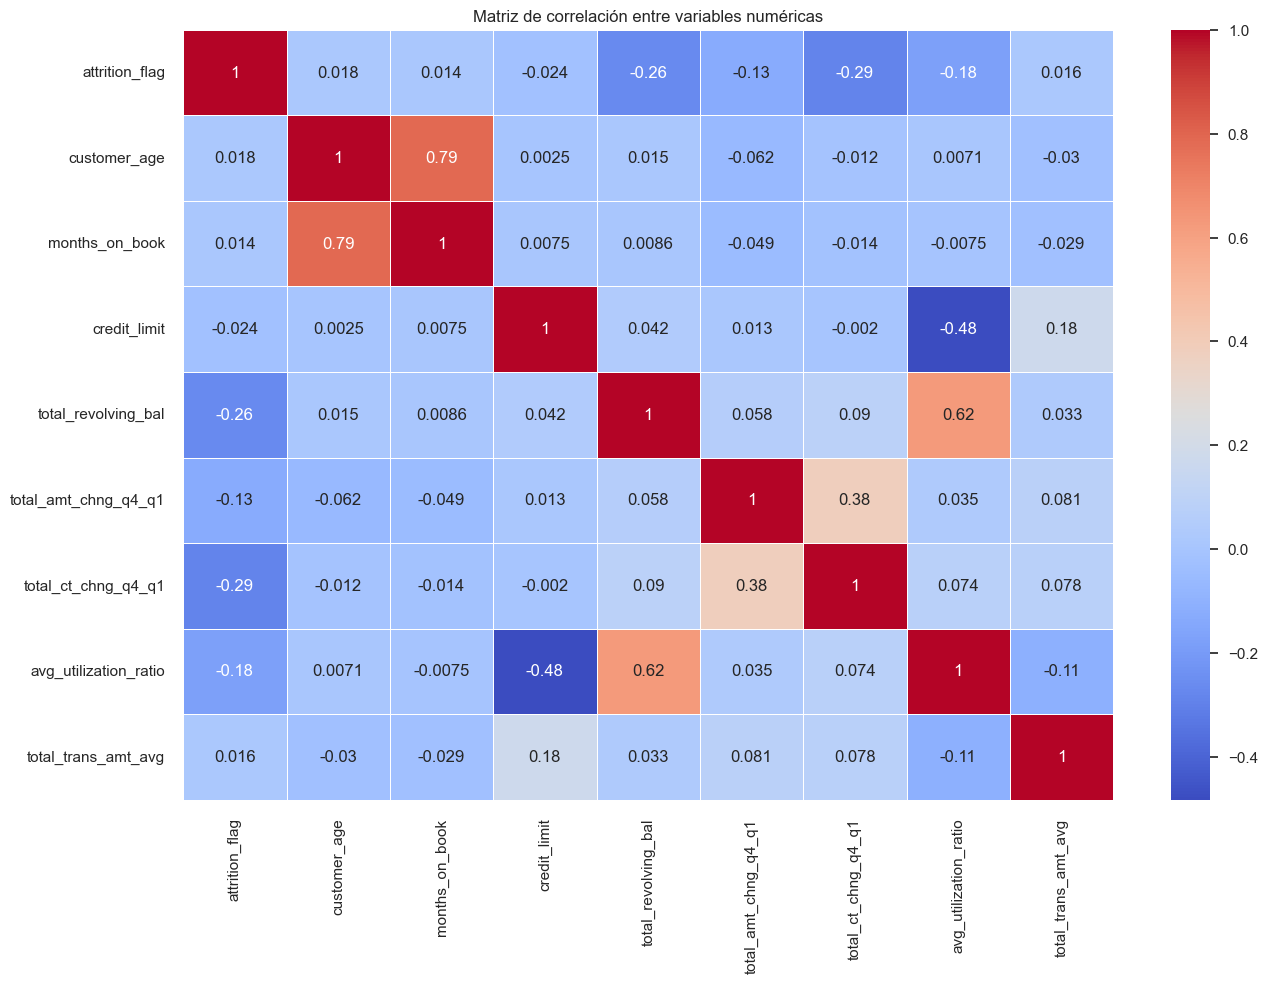

In [364]:
# Matriz de correlación de variables numéricas
corr_matrix = df_numeric.corr()

# Asegurarse de que 'Retained.in.2012.' esté en la lista de columnas
cols = [col for col in corr_matrix.columns if col != 'attrition_flag']
cols = ['attrition_flag'] + cols

# Reordenar la matriz de correlación
corr_matrix = corr_matrix[cols].loc[cols]

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

#### **Balanceo de clases**

#### Todas las variables se vuelven numéricas para hacer oversampling

In [365]:
df2_dummies = pd.get_dummies(df2, df2.select_dtypes(exclude=['int','float64']).columns, dtype=int)

Se crea el conjunto de datos con las variables numéricas y seleccionando las variables dummies a utilizar para los modelos

In [366]:
df2 = pd.concat([df2_dummies[['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'total_trans_amt_avg', 'gender_F', 'dependent_count_1',
       'dependent_count_2', 'dependent_count_3', 'dependent_count_4',
       'dependent_count_5', 'education_level_College',
       'education_level_Doctorate', 'education_level_Graduate',
       'education_level_High School', 'education_level_Uneducated',
       'marital_status_Married', 'marital_status_Single',
       'income_category_$40K - $60K', 'income_category_$60K - $80K', 'income_category_$80K - $120K',
       'income_category_Less than $40K', 'card_category_Blue',
       'total_relationship_count_2', 'total_relationship_count_3',
       'total_relationship_count_4', 'total_relationship_count_5',
       'total_relationship_count_6', 'months_inactive_12_mon_1', 'months_inactive_12_mon_2',
       'months_inactive_12_mon_3', 'months_inactive_12_mon_4',
       'months_inactive_12_mon_5', 'months_inactive_12_mon_6',
       'contacts_count_12_mon_0', 'contacts_count_12_mon_1',
       'contacts_count_12_mon_2', 'contacts_count_12_mon_3',
       'contacts_count_12_mon_4', 'contacts_count_12_mon_5']], df2['attrition_flag']], axis = 1)

In [367]:
X = df2.drop(columns = 'attrition_flag', axis = 1)
y = df2['attrition_flag']

#### Los métodos usados para oversampling son Random Oversampling, SMOTE y Adaptive Synthetic Sampling (ADASYN)

In [368]:
from Metodos_Oversampling import random_oversampling, smote_oversampling, adasyn_oversampling
X_resampled_1, y_resampled_1 = random_oversampling(X, y)
X_resampled_2, y_resampled_2 = smote_oversampling(X, y)
X_resampled_3, y_resampled_3 = adasyn_oversampling(X, y)

Distribución de clases después de Random Oversampling: Counter({0: 8500, 1: 8500})
Distribución de clases después de SMOTE: Counter({0: 8500, 1: 8500})
Distribución de clases después de ADASYN: Counter({0: 8500, 1: 8413})


#### Conjuntos de datos balanceados con los tres métodos

In [369]:
y_resampled_1 = pd.DataFrame(y_resampled_1, columns= ['attrition_flag'])
y_resampled_2 = pd.DataFrame(y_resampled_2, columns= ['attrition_flag'])
y_resampled_3 = pd.DataFrame(y_resampled_3, columns= ['attrition_flag'])

df3_ro = pd.concat([X_resampled_1, y_resampled_1], axis = 1)
df3_sm = pd.concat([X_resampled_2, y_resampled_2], axis = 1)
df3_ad = pd.concat([X_resampled_3, y_resampled_3], axis = 1)

#### Transformación de variables

In [ ]:
from Sesgo import stats, biased_variables

In [370]:
statistics_1 = stats(df3_ro[['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'total_trans_amt_avg']])
statistics_1

Variable      Skew         Mean  Standard deviation
0           customer_age -0.039646    46.423529            7.891190
1         months_on_book -0.088019    35.988118            7.931881
2           credit_limit  1.735162  8383.946235         9095.271521
3    total_revolving_bal  0.293507   961.922235          892.799239
4   total_amt_chng_q4_q1  0.945921     0.731245            0.220294
5    total_ct_chng_q4_q1  1.441068     0.647595            0.245766
6  avg_utilization_ratio  1.020302     0.229297            0.276992
7    total_trans_amt_avg  1.767911    62.962883           26.813441

In [371]:
statistics_2 = stats(df3_sm[['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'total_trans_amt_avg']])
statistics_2

Variable      Skew         Mean  Standard deviation
0           customer_age -0.033590    46.283765            7.386656
1         months_on_book -0.116805    35.869412            7.407742
2           credit_limit  1.726212  8408.256529         9095.943393
3    total_revolving_bal  0.291592   958.345941          888.089224
4   total_amt_chng_q4_q1  1.309997     0.732105            0.205393
5    total_ct_chng_q4_q1  1.661968     0.646490            0.231350
6  avg_utilization_ratio  1.012146     0.229694            0.277183
7    total_trans_amt_avg  1.799488    62.745376           25.093384

In [372]:
statistics_3 = stats(df3_ad[['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'total_trans_amt_avg']])
statistics_3

Variable      Skew         Mean  Standard deviation
0           customer_age -0.018329    46.215751            7.384757
1         months_on_book -0.084733    35.813930            7.412847
2           credit_limit  1.681078  8590.981789         9085.719275
3    total_revolving_bal  0.206242  1004.280553          887.776254
4   total_amt_chng_q4_q1  1.281126     0.732420            0.206498
5    total_ct_chng_q4_q1  1.667828     0.647996            0.232534
6  avg_utilization_ratio  0.963659     0.238782            0.279828
7    total_trans_amt_avg  1.781413    62.991003           25.158805

In [373]:
#Variables con sesgo mayor a 0,5 o menor a -0,5
biased_variables_1 = biased_variables(statistics_1)
biased_variables_1

2             credit_limit
4     total_amt_chng_q4_q1
5      total_ct_chng_q4_q1
6    avg_utilization_ratio
7      total_trans_amt_avg
Name: Variable, dtype: object

In [374]:
biased_variables_2 = biased_variables(statistics_2)
biased_variables_2

2             credit_limit
4     total_amt_chng_q4_q1
5      total_ct_chng_q4_q1
6    avg_utilization_ratio
7      total_trans_amt_avg
Name: Variable, dtype: object

In [375]:
biased_variables_3 = biased_variables(statistics_3)
biased_variables_3

2             credit_limit
4     total_amt_chng_q4_q1
5      total_ct_chng_q4_q1
6    avg_utilization_ratio
7      total_trans_amt_avg
Name: Variable, dtype: object

In [376]:
df_ro = df3_ro.copy()
df_sm = df3_sm.copy()
df_ad = df3_ad.copy()

In [377]:
#Transformación de variables en cada conjunto para disminuir su sesgo
df_ro['total_amt_chng_q4_q1'] = np.sqrt(df3_ro['total_amt_chng_q4_q1'])
df_ro['total_ct_chng_q4_q1'] = np.sqrt(df3_ro['total_ct_chng_q4_q1'])
df_ro['credit_limit'] = np.log(df3_ro['credit_limit'])
df_ro['total_trans_amt_avg'] = np.log(np.log(df3_ro['total_trans_amt_avg']))
df_ro['avg_utilization_ratio'] = np.sqrt(df3_ro['avg_utilization_ratio'])

In [378]:
df_sm['total_amt_chng_q4_q1'] = np.sqrt(df3_sm['total_amt_chng_q4_q1'])
df_sm['total_ct_chng_q4_q1'] = np.sqrt(df3_sm['total_ct_chng_q4_q1'])
df_sm['credit_limit'] = np.log(df3_sm['credit_limit'])
df_sm['total_trans_amt_avg'] = np.log(np.log(df3_sm['total_trans_amt_avg']))
df_sm['avg_utilization_ratio'] = np.sqrt(df3_sm['avg_utilization_ratio'])

In [379]:
df_ad['total_amt_chng_q4_q1'] = np.sqrt(df3_ad['total_amt_chng_q4_q1'])
df_ad['total_ct_chng_q4_q1'] = np.sqrt(df3_ad['total_ct_chng_q4_q1'])
df_ad['credit_limit'] = np.log(df3_ad['credit_limit'])
df_ad['total_trans_amt_avg'] = np.log(np.log(df3_ad['total_trans_amt_avg']))
df_ad['avg_utilization_ratio'] = np.sqrt(df3_ad['avg_utilization_ratio'])

In [380]:
statistics_1 = stats(df_ro[['credit_limit', 'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 
                            'avg_utilization_ratio', 'total_trans_amt_avg']])
statistics_1

Variable      Skew      Mean  Standard deviation
0           credit_limit  0.481090  8.555612            0.949059
1   total_amt_chng_q4_q1 -0.468134  0.844784            0.132611
2    total_ct_chng_q4_q1 -0.223671  0.789653            0.155064
3  avg_utilization_ratio  0.336509  0.349281            0.327576
4    total_trans_amt_avg  0.602546  1.400335            0.085568

In [381]:
statistics_2 = stats(df_sm[['credit_limit', 'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 
                            'avg_utilization_ratio', 'total_trans_amt_avg']])
statistics_2

Variable      Skew      Mean  Standard deviation
0           credit_limit  0.476344  8.559738            0.948499
1   total_amt_chng_q4_q1  0.050333  0.847307            0.119063
2    total_ct_chng_q4_q1  0.129186  0.791466            0.141679
3  avg_utilization_ratio  0.335381  0.349728            0.327706
4    total_trans_amt_avg  0.629419  1.401878            0.080612

In [382]:
statistics_3 = stats(df_ad[['credit_limit', 'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 
                            'avg_utilization_ratio', 'total_trans_amt_avg']])
statistics_3

Variable      Skew      Mean  Standard deviation
0           credit_limit  0.431890  8.592966            0.942354
1   total_amt_chng_q4_q1  0.013240  0.847365            0.119970
2    total_ct_chng_q4_q1  0.115417  0.792297            0.142347
3  avg_utilization_ratio  0.279579  0.362368            0.327839
4    total_trans_amt_avg  0.617317  1.402826            0.080650

#### Estandarización/Normalización de las variables numéricas

In [383]:
dfro_numeric = df_ro.iloc[:, range(8)]
dfsm_numeric = df_sm.iloc[:, range(8)]
dfad_numeric = df_ad.iloc[:, range(8)]

In [384]:
scaler = StandardScaler()
dfro_numeric = scaler.fit_transform(dfro_numeric)
dfsm_numeric = scaler.fit_transform(dfsm_numeric)
dfad_numeric = scaler.fit_transform(dfad_numeric)

In [385]:
dfro_numeric = pd.DataFrame(dfro_numeric, columns = df_ro.iloc[:, range(8)].columns)
dfsm_numeric = pd.DataFrame(dfsm_numeric, columns = df_sm.iloc[:, range(8)].columns)
dfad_numeric = pd.DataFrame(dfad_numeric, columns = df_ad.iloc[:, range(8)].columns)

#### Se obtienen tres conjuntos de datos para cada uno de los métodos utilizados para haver oversampling y determinar cual hace que los modelos tengan un buen desempeño

In [386]:
df_ro = pd.concat([dfro_numeric, df_ro.iloc[:, range(8, 44)]], axis = 1)
df_sm = pd.concat([dfsm_numeric, df_sm.iloc[:, range(8, 44)]], axis = 1)
df_ad = pd.concat([dfad_numeric, df_ad.iloc[:, range(8, 44)]], axis = 1)

In [387]:
df_ro['attrition_flag'] = df_ro['attrition_flag'].astype('int')
df_sm['attrition_flag'] = df_sm['attrition_flag'].astype('int')
df_ad['attrition_flag'] = df_ad['attrition_flag'].astype('int')

### 3. Modeling and evaluation

###   Pycaret

In [ ]:
#!pip install pycaret

#### Se utiliza el módulo de clasificación de Pycaret para determinar cuál método de Oversampling genera mejor rendimiento en los modelos

#### Utilizando los datos balanceados con Random Oversampling

In [ ]:
from pycaret.classification import *
s1 = setup(df_ro, target = 'attrition_flag', session_id = 123, preprocess=False)

In [ ]:
best_1 = compare_models()

#### Utilizando el 20% de los datos no balanceados como test

In [ ]:
df_sample = df2.sample(frac=0.2, random_state=42).reset_index(drop=True)
df_sample_numeric = df_sample.iloc[: , range(8)]
df_sample_numeric = scaler.fit_transform(df_sample_numeric)
df_sample_numeric = pd.DataFrame(df_sample_numeric, columns = df_sample.iloc[:, range(8)].columns)
df_test = pd.concat([df_sample_numeric, df_sample.iloc[:, range(8, 44)]], axis = 1)

In [ ]:
predictions = predict_model(best_1, data=df_test)
predictions

#### Utilizando los datos balanceados con SMOTE

In [ ]:
s2 = setup(df_sm, target = 'attrition_flag', session_id = 123, preprocess=False)

In [ ]:
best_2 = compare_models()

#### Test con el 20% de los datos no balanceados

In [ ]:
predictions = predict_model(best_2, data=df_test)
predictions

#### Utilizando los datos balanceados con ADASYN

In [ ]:
s3 = setup(df_ad, target = 'attrition_flag', session_id = 123, preprocess=False)

In [ ]:
best_3 = compare_models()

#### Test con el 20% de los datos no balanceados

In [ ]:
predictions = predict_model(best_3, data=df_test)
predictions

#### Con base en los resultados de test se utilizan los datos generados con Random Oversampling ya que con este se obtienen mejores métricas

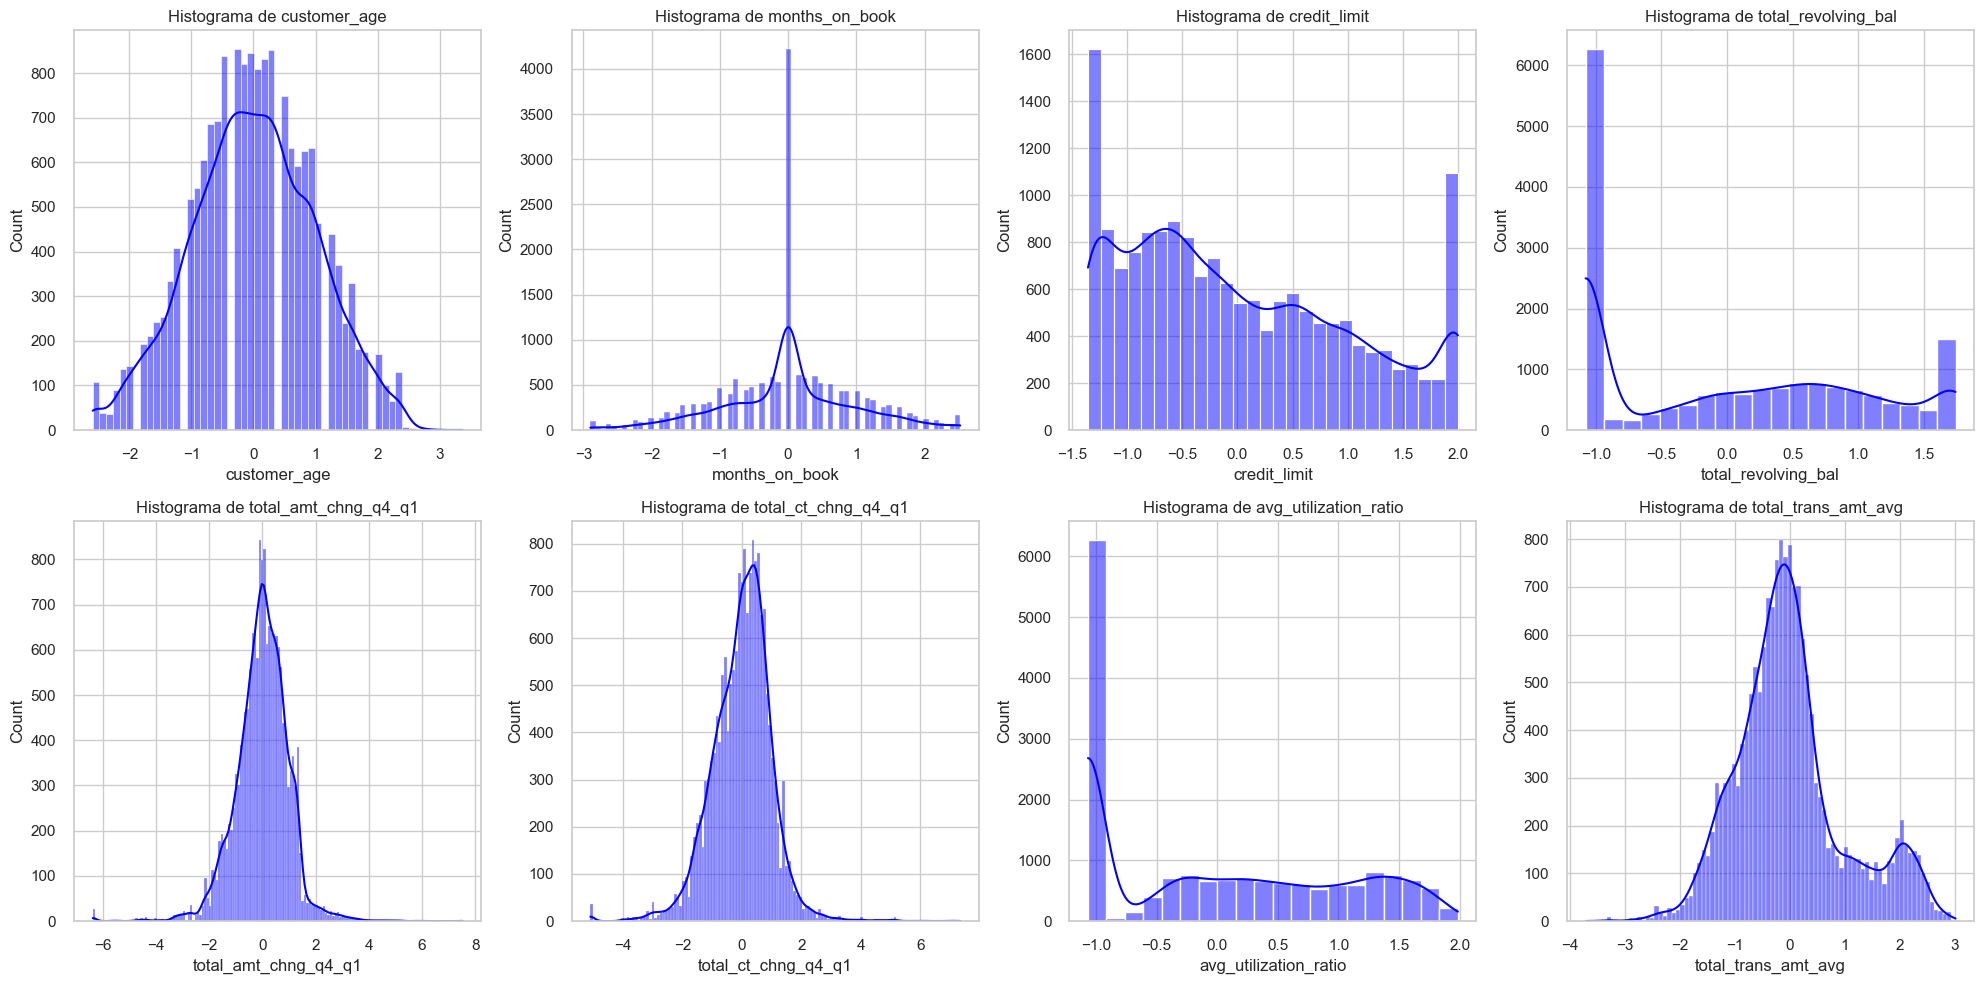

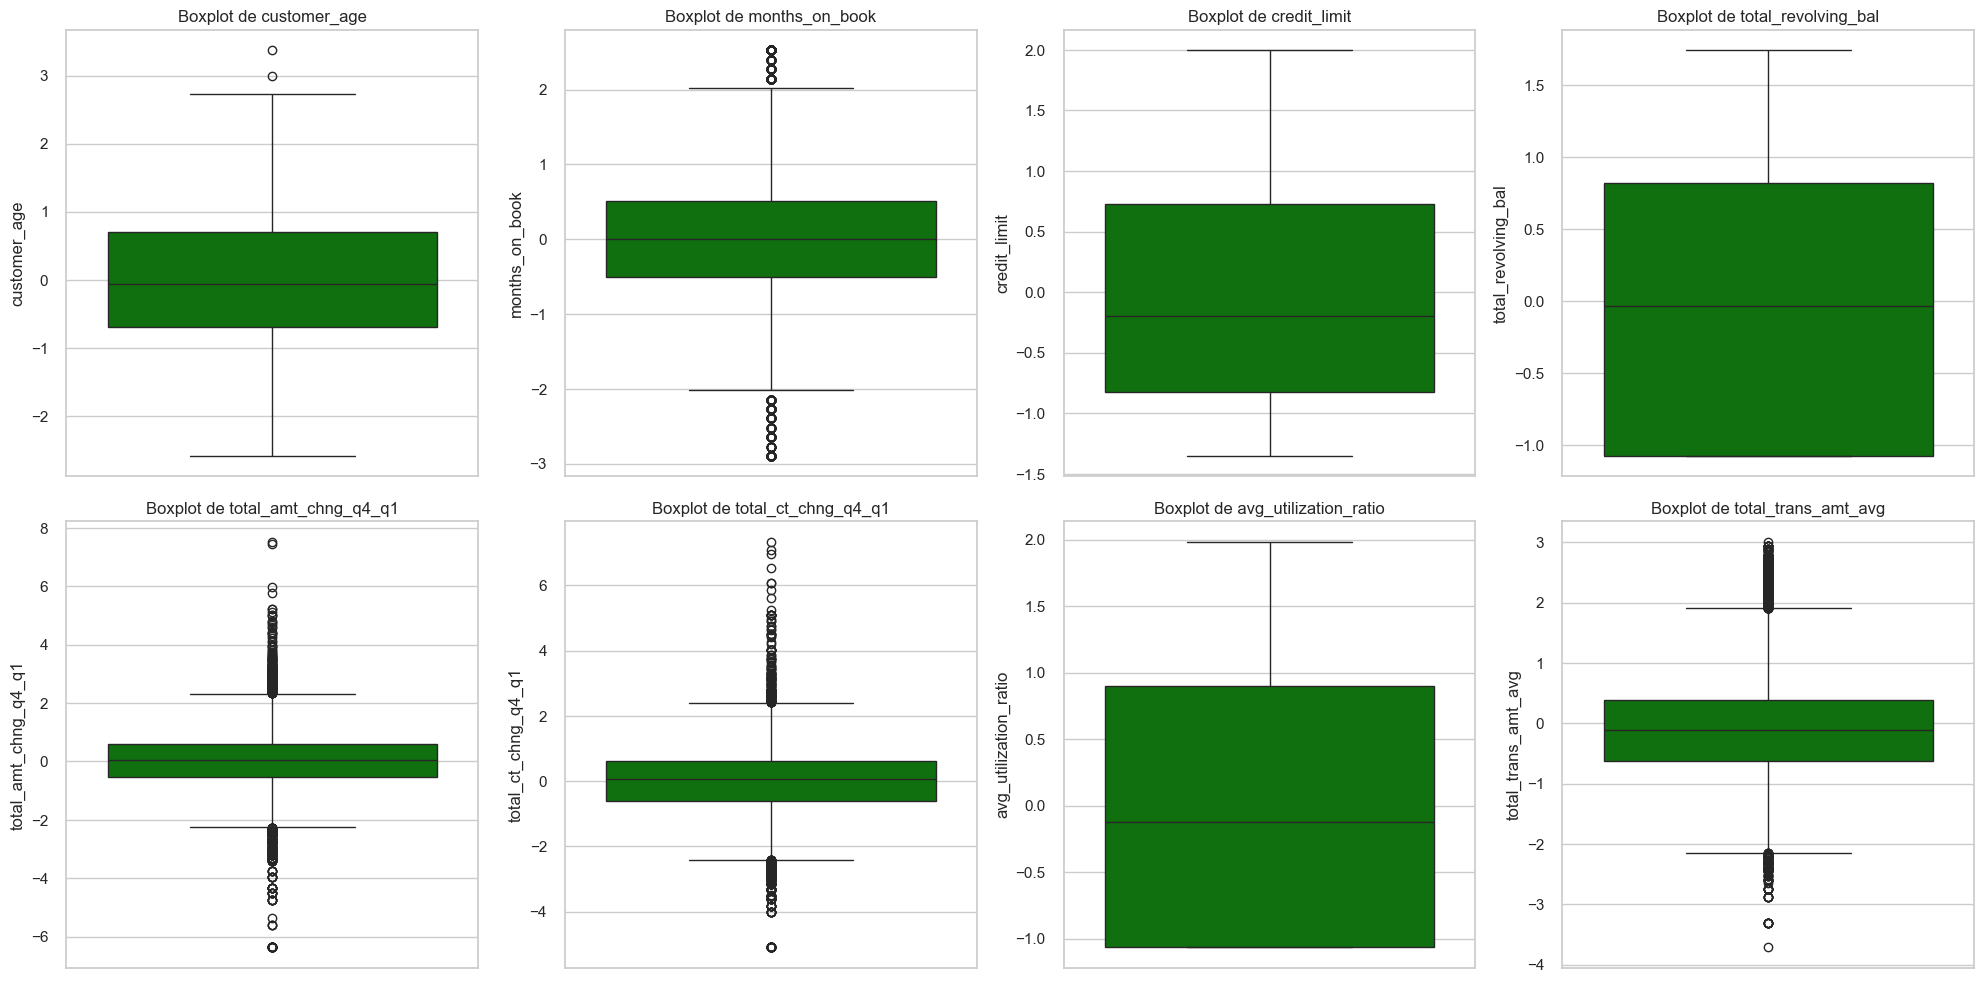

In [388]:
plot_numerical(df_ro.iloc[:, range(8)])

In [389]:
X = df_ro.drop(columns=["attrition_flag"])
y = df_ro["attrition_flag"].astype(int)

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Grid search con Gradient Boosting

In [391]:
import importlib
import Grid_Search
importlib.reload(Grid_Search)

<module 'Grid_Search' from '/Users/andreeamharaaronquiroz/Documents/MAESTRIA ANDREE/ProyectoChurn2/Grid_Search.py'>

In [392]:
    # Importar el modelo y el tuner
from Gradient_Boosting import GradientBoostingChurn
from Grid_Search import Tuner
# Crear el modelo base para GridSearch sin parámetros iniciales
model_GBc = GradientBoostingChurn()  # Instancia sin parámetros adicionales
# Crear el tuner con los parámetros predeterminados en Grid_Search
gb_tuner = Tuner(model_GBc, use_random_search=False)  # Asegura que Tuner reciba el modelo base correctamente
# Ajustar el modelo usando GridSearch y obtener los mejores parámetros
best_params_gb = gb_tuner.tune(X_train, y_train) 
# Actualizar el modelo con los mejores parámetros
model_GBc.update_params(best_params_gb)

Modelo: GradientBoostingChurn
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.5}


### Gradient Boosting

In [393]:
import importlib
import Gradient_Boosting
importlib.reload(Gradient_Boosting)

<module 'Gradient_Boosting' from '/Users/andreeamharaaronquiroz/Documents/MAESTRIA ANDREE/ProyectoChurn2/Gradient_Boosting.py'>

In [394]:
# Entrenar y evaluar el modelo con los mejores parámetros
model_GBc.fit(X_train, y_train, feature_names=X.columns.tolist())
# Evaluar el modelo en los conjuntos de entrenamiento y prueba
metrics = model_GBc.evaluate(X_train, y_train, X_test, y_test)

In [ ]:
# Imprimir resultados de evaluación
print("Reporte de Clasificación para el conjunto de Entrenamiento:")
print(pd.DataFrame(metrics.iloc[0]['Classification Report']))
print("\nROC AUC Score para el conjunto de Entrenamiento:", metrics.iloc[0]['ROC AUC Score'])
print("\nMatriz de Confusión para el conjunto de Entrenamiento:\n", metrics.iloc[0]['Confusion Matrix'])

print("\n\nReporte de Clasificación para el conjunto de Prueba:")
print(pd.DataFrame(metrics.iloc[1]['Classification Report']))
print("\nROC AUC Score para el conjunto de Prueba:", metrics.iloc[1]['ROC AUC Score'])
print("\nMatriz de Confusión para el conjunto de Prueba:\n", metrics.iloc[1]['Confusion Matrix'])


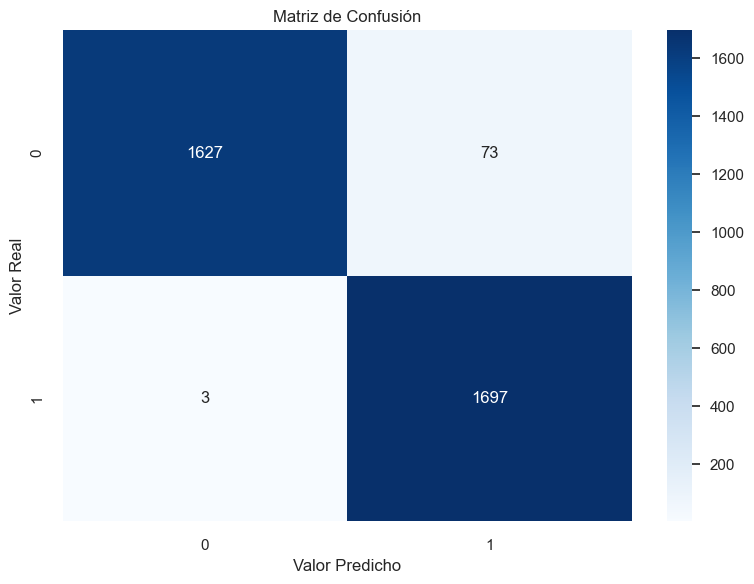

In [395]:
model_GB.plot_confusion_matrix(y_test,y_pred=model_GB.predict(X_test))

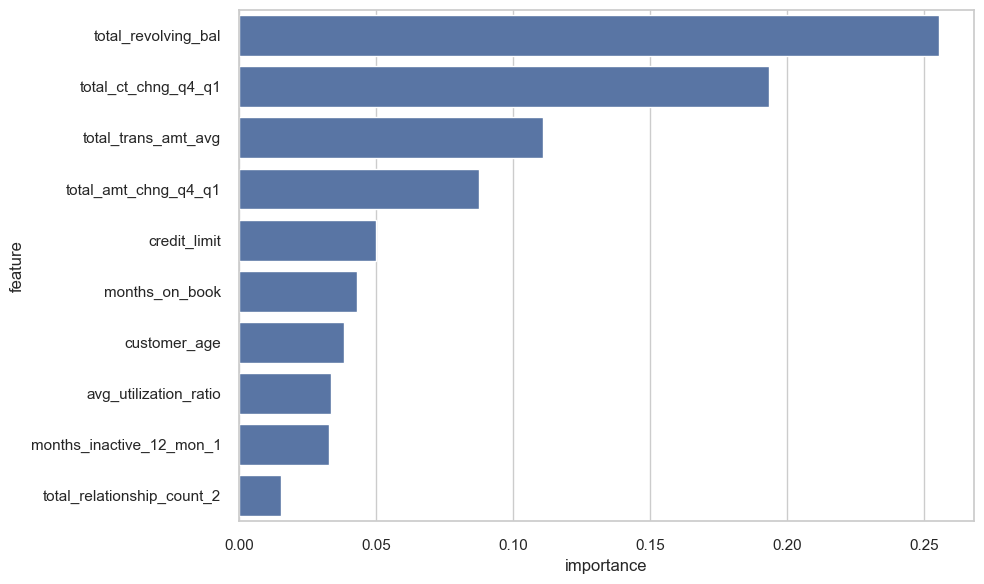

feature  importance
3              total_revolving_bal    0.255545
5              total_ct_chng_q4_q1    0.193418
7              total_trans_amt_avg    0.110882
4             total_amt_chng_q4_q1    0.087461
2                     credit_limit    0.050095
1                   months_on_book    0.043062
0                     customer_age    0.038221
6            avg_utilization_ratio    0.033456
31        months_inactive_12_mon_1    0.032684
26      total_relationship_count_2    0.015333
30      total_relationship_count_6    0.009544
28      total_relationship_count_4    0.008268
38         contacts_count_12_mon_1    0.007626
39         contacts_count_12_mon_2    0.006819
40         contacts_count_12_mon_3    0.006252
32        months_inactive_12_mon_2    0.005445
33        months_inactive_12_mon_3    0.005192
37         contacts_count_12_mon_0    0.005154
41         contacts_count_12_mon_4    0.005036
29      total_relationship_count_5    0.004835
19          marital_status_Married    0.004697
8                         gender_F    0.004431
12               dependent_count_4    0.004422
34        months_inactive_12_mon_4    0.004217
18      education_level_Uneducated    0.004115
27      total_relationship_count_3    0.004039
17     education_level_High School    0.003992
9                dependent_count_1    0.003899
16        education_level_Graduate    0.003871
20           marital_status_Single    0.003644
15       education_level_Doctorate    0.003605
11               dependent_count_3    0.003588
24  income_category_Less than $40K    0.003533
23    income_category_$80K - $120K    0.003373
22     income_category_$60K - $80K    0.003136
42         contacts_count_12_mon_5    0.003023
14         education_level_College    0.002819
21     income_category_$40K - $60K    0.002612
10               dependent_count_2    0.002356
36        months_inactive_12_mon_6    0.002007
25              card_category_Blue    0.001994
13               dependent_count_5    0.001439
35        months_inactive_12_mon_5    0.000859

In [396]:
# Visualizar las características más importantes
model_GB.plot_feature_importance()

### Grid search con Adaboost

In [397]:
import importlib
import Ada_Boost_Churn
importlib.reload(Ada_Boost_Churn)

<module 'Ada_Boost_Churn' from '/Users/andreeamharaaronquiroz/Documents/MAESTRIA ANDREE/ProyectoChurn2/Ada_Boost_Churn.py'>

In [398]:
# Importar el modelo y el tuner
from Ada_Boost_Churn import AdaBoostChurn
from Grid_Search import Tuner

# Crear el modelo base para GridSearch sin parámetros iniciales
model_ada = AdaBoostChurn()  # Instancia sin parámetros adicionales

# Crear el tuner con los parámetros predeterminados en Grid_Search
ada_tuner = Tuner(model_ada, use_random_search=False)

# Ajustar el modelo usando GridSearch y obtener los mejores parámetros
best_params_ada = ada_tuner.tune(X_train, y_train)

# Actualizar el modelo con los mejores parámetros
model_ada.set_params(**best_params_ada)


Modelo: AdaBoostChurn
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'algorithm': 'SAMME', 'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}


### Adaboost

In [399]:
# Ajustar el modelo
model_ada.fit(X_train, y_train, feature_names=X.columns.tolist())

# Evaluar en entrenamiento y prueba
metrics = model_ada.evaluate(X_train, y_train, X_test, y_test)

# Imprimir los resultados
print("Reporte de Clasificación para el conjunto de Entrenamiento:")
print(metrics['classification_report_train'])
print("\nReporte de Clasificación para el conjunto de Prueba:")
print(metrics['classification_report_test'])

Reporte de Clasificación para el conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6800
           1       0.86      0.85      0.85      6800

    accuracy                           0.85     13600
   macro avg       0.85      0.85      0.85     13600
weighted avg       0.85      0.85      0.85     13600


Reporte de Clasificación para el conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1700
           1       0.84      0.84      0.84      1700

    accuracy                           0.84      3400
   macro avg       0.84      0.84      0.84      3400
weighted avg       0.84      0.84      0.84      3400



In [400]:
# Imprimir resultados de evaluación
print("\nROC AUC Score para el conjunto de Entrenamiento:", metrics['roc_auc_score_train'])
print("\nMatriz de Confusión para el conjunto de Entrenamiento:\n", metrics['confusion_matrix_train'])

print("\n\nROC AUC Score para el conjunto de Prueba:", metrics['roc_auc_score_test'])
print("\nMatriz de Confusión para el conjunto de Prueba:\n", metrics['confusion_matrix_test'])


ROC AUC Score para el conjunto de Entrenamiento: 0.9359749567474047

Matriz de Confusión para el conjunto de Entrenamiento:
 [[5822  978]
 [1019 5781]]


ROC AUC Score para el conjunto de Prueba: 0.9278430795847752

Matriz de Confusión para el conjunto de Prueba:
 [[1432  268]
 [ 264 1436]]


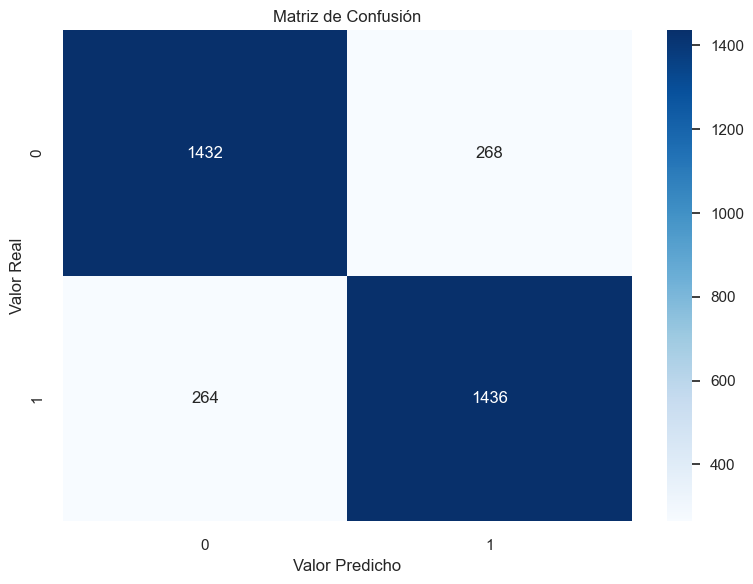

In [401]:
# Visualizar la matriz de confusión para el conjunto de prueba
model_ada.plot_confusion_matrix(X_test, y_true=y_test)

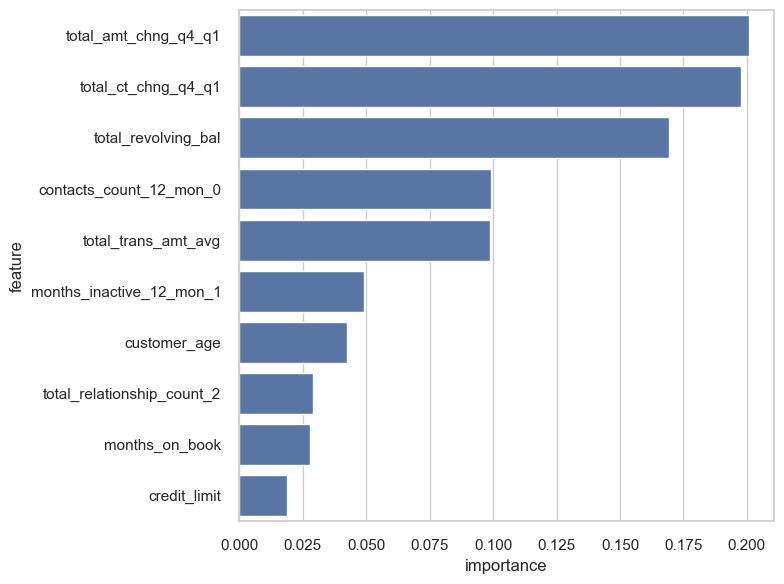

feature  importance
4             total_amt_chng_q4_q1    0.200630
5              total_ct_chng_q4_q1    0.197529
3              total_revolving_bal    0.169358
37         contacts_count_12_mon_0    0.099241
7              total_trans_amt_avg    0.098904
31        months_inactive_12_mon_1    0.049189
0                     customer_age    0.042348
26      total_relationship_count_2    0.028974
1                   months_on_book    0.028022
2                     credit_limit    0.018857
38         contacts_count_12_mon_1    0.018688
6            avg_utilization_ratio    0.015107
39         contacts_count_12_mon_2    0.008153
30      total_relationship_count_6    0.006415
8                         gender_F    0.004673
34        months_inactive_12_mon_4    0.003689
19          marital_status_Married    0.003596
32        months_inactive_12_mon_2    0.002276
28      total_relationship_count_4    0.001465
40         contacts_count_12_mon_3    0.001169
35        months_inactive_12_mon_5    0.000923
22     income_category_$60K - $80K    0.000472
17     education_level_High School    0.000240
15       education_level_Doctorate    0.000082
36        months_inactive_12_mon_6    0.000000
33        months_inactive_12_mon_3    0.000000
41         contacts_count_12_mon_4    0.000000
29      total_relationship_count_5    0.000000
21     income_category_$40K - $60K    0.000000
27      total_relationship_count_3    0.000000
25              card_category_Blue    0.000000
24  income_category_Less than $40K    0.000000
23    income_category_$80K - $120K    0.000000
20           marital_status_Single    0.000000
18      education_level_Uneducated    0.000000
16        education_level_Graduate    0.000000
14         education_level_College    0.000000
13               dependent_count_5    0.000000
12               dependent_count_4    0.000000
11               dependent_count_3    0.000000
10               dependent_count_2    0.000000
9                dependent_count_1    0.000000
42         contacts_count_12_mon_5    0.000000

In [402]:
# Visualizar las características más importantes
model_ada.plot_feature_importance()

### Grid search con SVM

In [403]:
import importlib
import SVM_Churn  # Nombre del archivo con la clase SVMChurn
importlib.reload(SVM_Churn)

# Importar el modelo y el tuner
from SVM_Churn import SVMChurn
from Grid_Search import Tuner

# Crear el modelo base para GridSearch sin parámetros iniciales
model_svm = SVMChurn()  # Instancia sin parámetros adicionales

# Crear el tuner con los parámetros predeterminados en Grid_Search
svm_tuner = Tuner(model_svm, use_random_search=False)

# Ajustar el modelo usando GridSearch y obtener los mejores parámetros
best_params_svm = svm_tuner.tune(X_train, y_train)

# Actualizar el modelo con los mejores parámetros
model_svm.set_params(**best_params_svm)


Modelo: SVMChurn
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}


### SVM

In [407]:
# Ajustar el modelo
model_svm.fit(X_train, y_train)

# Evaluar en entrenamiento y prueba
metrics = model_svm.evaluate(X_train, y_train, X_test, y_test)

# Imprimir los resultados
print("Reporte de Clasificación para el conjunto de Entrenamiento:")
print(metrics['classification_report_train'])
print("\nReporte de Clasificación para el conjunto de Prueba:")
print(metrics['classification_report_test'])

Reporte de Clasificación para el conjunto de Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6800
           1       0.99      1.00      0.99      6800

    accuracy                           0.99     13600
   macro avg       0.99      0.99      0.99     13600
weighted avg       0.99      0.99      0.99     13600


Reporte de Clasificación para el conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1700
           1       0.93      0.99      0.96      1700

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400



In [408]:
# Imprimir resultados de evaluación
print("\nROC AUC Score para el conjunto de Entrenamiento:", metrics['roc_auc_score_train'])
print("\nMatriz de Confusión para el conjunto de Entrenamiento:\n", metrics['confusion_matrix_train'])

print("\n\nROC AUC Score para el conjunto de Prueba:", metrics['roc_auc_score_test'])
print("\nMatriz de Confusión para el conjunto de Prueba:\n", metrics['confusion_matrix_test'])


ROC AUC Score para el conjunto de Entrenamiento: 0.9989794766435985

Matriz de Confusión para el conjunto de Entrenamiento:
 [[6714   86]
 [  16 6784]]


ROC AUC Score para el conjunto de Prueba: 0.9878228373702422

Matriz de Confusión para el conjunto de Prueba:
 [[1570  130]
 [  21 1679]]


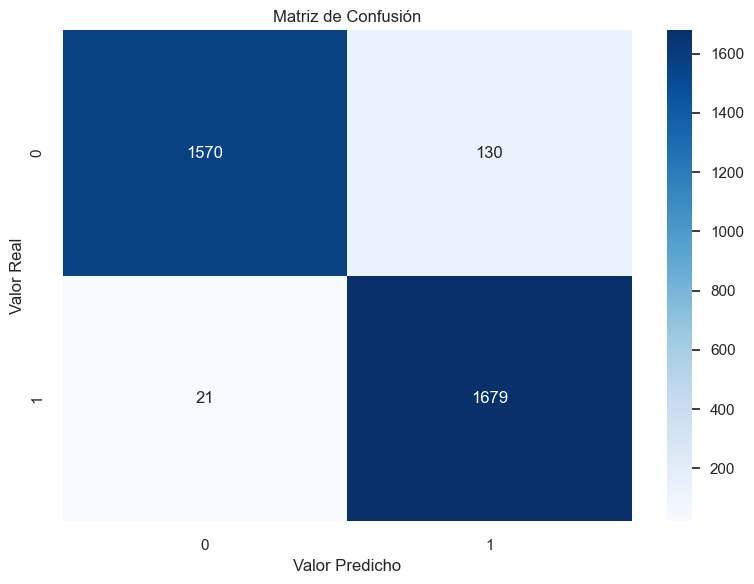

In [409]:
# Visualizar la matriz de confusión para el conjunto de prueba
model_svm.plot_confusion_matrix(X_test, y_true=y_test)

In [410]:
# Visualizar las características más importantes (en caso de que tenga alguna interpretación)
model_svm.plot_feature_importance()

La visualización de importancia solo está disponible para kernels lineales.


### Red Neuronal

In [ ]:
import importlib
import Modelo_RN
importlib.reload(Modelo_RN)

In [ ]:
from Modelo_RN import ModeloRedNeuronal

In [ ]:
model = ModeloRedNeuronal(input_shape=X.shape[1])

In [ ]:
model.create_model(input_shape=X.shape[1])

#### La arquitectura de la red y el número de parámetros a entrenar se presentan en la tabla anterior

In [ ]:
history, X_test, y_test, X_train, y_train = model.train(X, y, epochs=15)

In [ ]:
auc, loss, precision, recall, accuracy = model.evaluate(X_test, y_test)

In [ ]:
predictions = model.prediction(X_test)
model.classification_report(y_test, predictions)

In [ ]:
model.confusion_matrix(y_test, predictions)

### Grid search con Red Neuronal

In [ ]:
import importlib
import Grid_Search_NN
importlib.reload(Grid_Search_NN)

In [ ]:
from Grid_Search_NN import grid_search_model

In [ ]:
from Grid_Search import Tuner

classifier = KerasClassifier(build_fn = grid_search_model(input_shape=X.shape[1], optimizer='adam'))

nn_tuner = Tuner(classifier , use_random_search=False, score='recall')  # Aquí pasas el modelo correctamente
# Ajustar el modelo usando GridSearch y obtener los mejores parámetros
best_params = nn_tuner.tune_nn(X_train, y_train)


### Red neuronal con parámetros de Grid Search

In [ ]:
model_2 = ModeloRedNeuronal(input_shape=X.shape[1])
model_2.create_best_model(input_shape=X.shape[1])
history_2, X_test, y_test, X_train, y_train = model_2.train(X, y, epochs=15, batch_size=32)

In [ ]:
auc, loss, precision, recall, accuracy = model_2.evaluate(X_test, y_test)

In [ ]:
predictions_2 = model_2.prediction(X_test)
model_2.classification_report(y_test, predictions_2)

In [ ]:
model_2.confusion_matrix(y_test, predictions_2)

In [ ]:
plt.plot(history.history['loss'], label='Initial Parameters')
plt.plot(history_2.history['loss'], label='GridSearchCV Best Parameters')
plt.title('Loss Function Over Epochs')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
from Grid_Search import Tuner
classifier_2 = KerasClassifier(build_fn = grid_search_model(input_shape=X.shape[1], optimizer='adam'))

nn_tuner = Tuner(classifier_2 , use_random_search=False, score='recall')  # Aquí pasas el modelo correctamente
# Ajustar el modelo usando GridSearch y obtener los mejores parámetros
best_params = nn_tuner.tune_nn(X_train, y_train)
